In [44]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("YandexAndGoogle.csv", sep=";")
data["Время"] = data["Время"].str.split(" - ").str[0]
data.set_index("Время", inplace=True)
data = data.loc['2023-07-09'::]


print(data.head())
print(data.tail())


              Google  Google Доля    Яндекс   Яндекс Доля
Время                                                    
2023-07-09  78448465     0.373878  130654529     0.622687
2023-07-10  92333856     0.367624  157991251     0.629037
2023-07-11  92038599     0.367547  157537418     0.629110
2023-07-12  91273579     0.366105  157177031     0.630448
2023-07-13  89284018     0.364924  154516800     0.631545
              Google  Google Доля    Яндекс   Яндекс Доля
Время                                                    
2025-02-07  89436201     0.325604  184376241     0.671245
2025-02-08  79122275     0.328271  161089000     0.668343
2025-02-09  84102918     0.324524  174233550     0.672308
2025-02-10  98672183     0.321672  207112092     0.675187
2025-02-11  97031354     0.322237  203158053     0.674679


Так как 9 июля 2023 года произошла смена методологии подсчёта посещений, временной ряд до и после этой даты не сопоставим, и мы будем работать только с последней частью.

In [45]:
import numpy as np
data.info()
data.describe()
print(len(data))

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 2023-07-09 to 2025-02-11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Google       584 non-null    int64  
 1   Google Доля  584 non-null    float64
 2   Яндекс       584 non-null    int64  
 3   Яндекс Доля  584 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 22.8+ KB
584


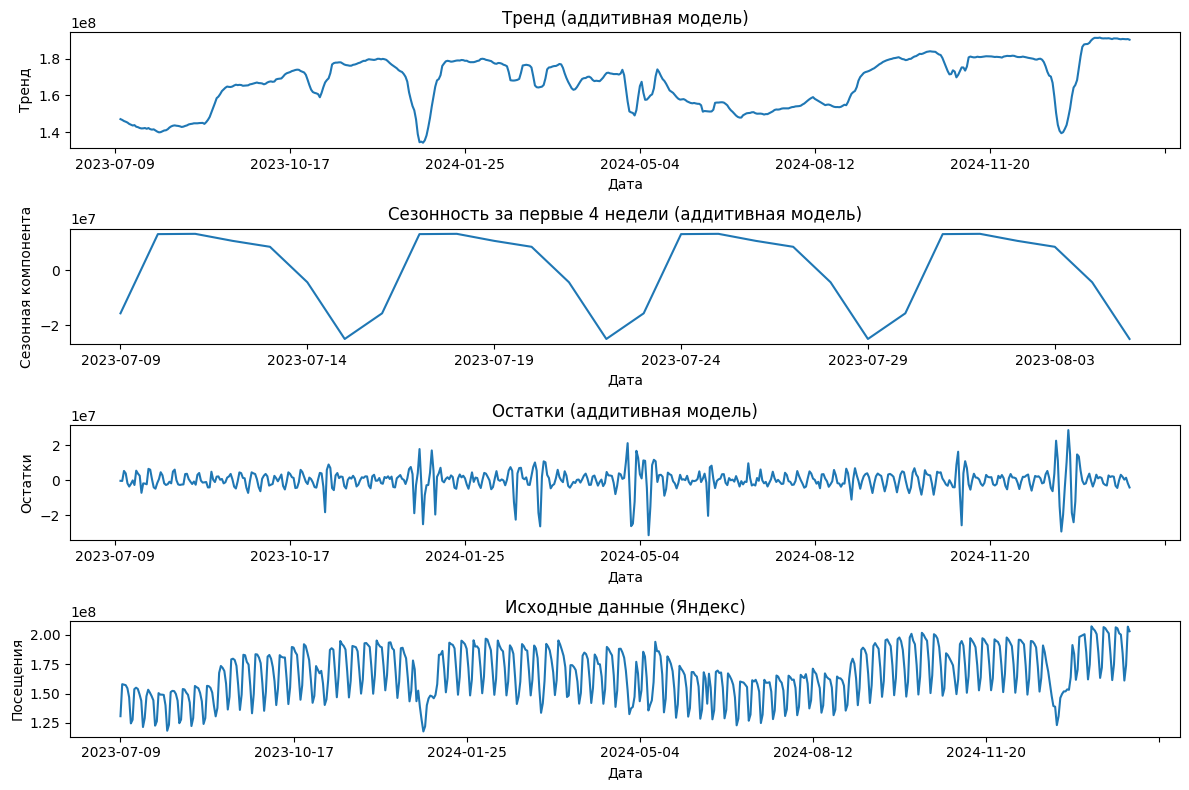

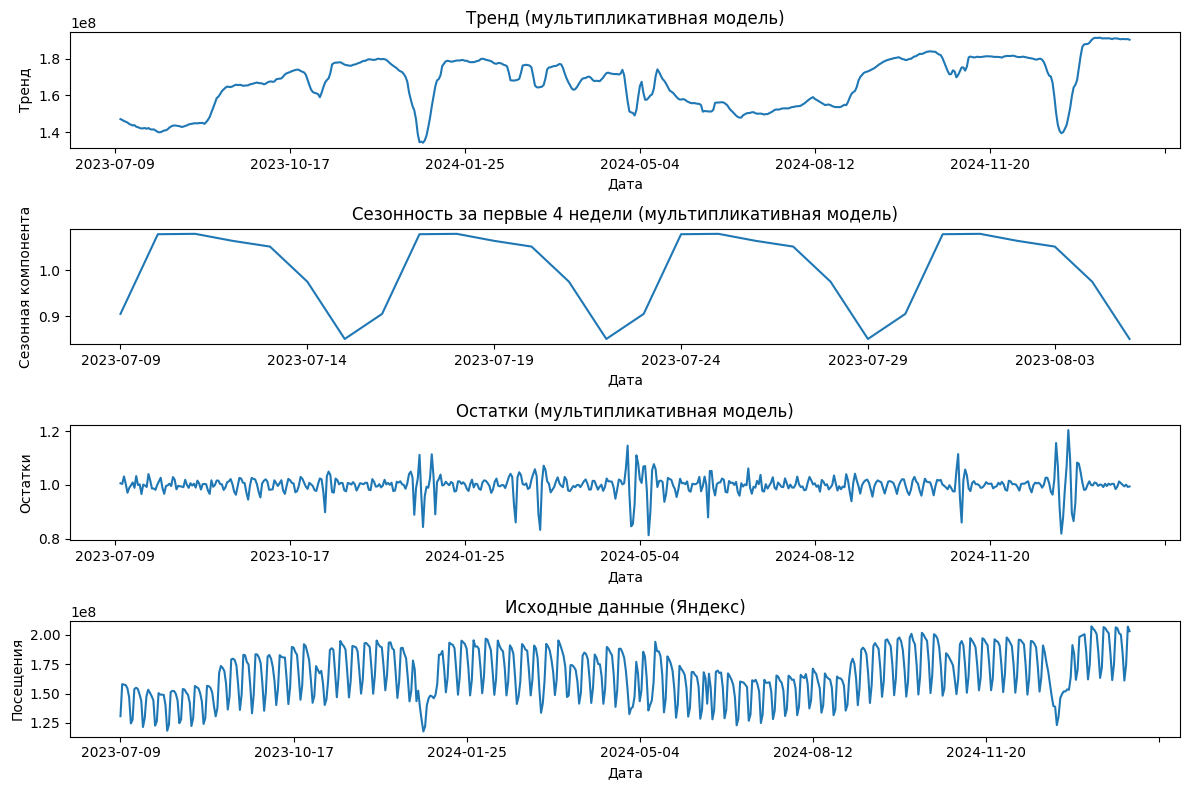

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data.rename(columns={"Яндекс ": "Views"}, inplace=True)
data.rename(columns={"Время ": "Time"}, inplace=True)


result_add = seasonal_decompose(data['Views'], model='additive', period=7)


result_mul = seasonal_decompose(data['Views'], model='multiplicative', period=7)


plt.figure(figsize=(12, 8))


plt.subplot(4, 1, 1)
result_add.trend.plot()
plt.title('Тренд (аддитивная модель)')
plt.xlabel('Дата')
plt.ylabel('Тренд')


plt.subplot(4, 1, 2)
result_add.seasonal[:28].plot()  # Первые 4 недели
plt.title('Сезонность за первые 4 недели (аддитивная модель)')
plt.xlabel('Дата')
plt.ylabel('Сезонная компонента')


plt.subplot(4, 1, 3)
result_add.resid.plot()
plt.title('Остатки (аддитивная модель)')
plt.xlabel('Дата')
plt.ylabel('Остатки')


plt.subplot(4, 1, 4)
data['Views'].plot()
plt.title('Исходные данные (Яндекс)')
plt.xlabel('Дата')
plt.ylabel('Посещения')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

# Тренд
plt.subplot(4, 1, 1)
result_mul.trend.plot()
plt.title('Тренд (мультипликативная модель)')
plt.xlabel('Дата')
plt.ylabel('Тренд')


plt.subplot(4, 1, 2)
result_mul.seasonal[:28].plot()  
plt.title('Сезонность за первые 4 недели (мультипликативная модель)')
plt.xlabel('Дата')
plt.ylabel('Сезонная компонента')


plt.subplot(4, 1, 3)
result_mul.resid.plot()
plt.title('Остатки (мультипликативная модель)')
plt.xlabel('Дата')
plt.ylabel('Остатки')


plt.subplot(4, 1, 4)
data['Views'].plot()
plt.title('Исходные данные (Яндекс)')
plt.xlabel('Дата')
plt.ylabel('Посещения')

plt.tight_layout()
plt.show()

Мы можем заменить ярковыраженную недельную сезонность и сложный восходящий тренд.

In [47]:
print(data.Views.head())
print(result_mul.trend)


Время
2023-07-09    130654529
2023-07-10    157991251
2023-07-11    157537418
2023-07-12    157177031
2023-07-13    154516800
Name: Views, dtype: int64
Время
2023-07-09             NaN
2023-07-10             NaN
2023-07-11             NaN
2023-07-12    1.470289e+08
2023-07-13    1.465948e+08
                  ...     
2025-02-07    1.905930e+08
2025-02-08    1.902374e+08
2025-02-09             NaN
2025-02-10             NaN
2025-02-11             NaN
Name: trend, Length: 584, dtype: float64


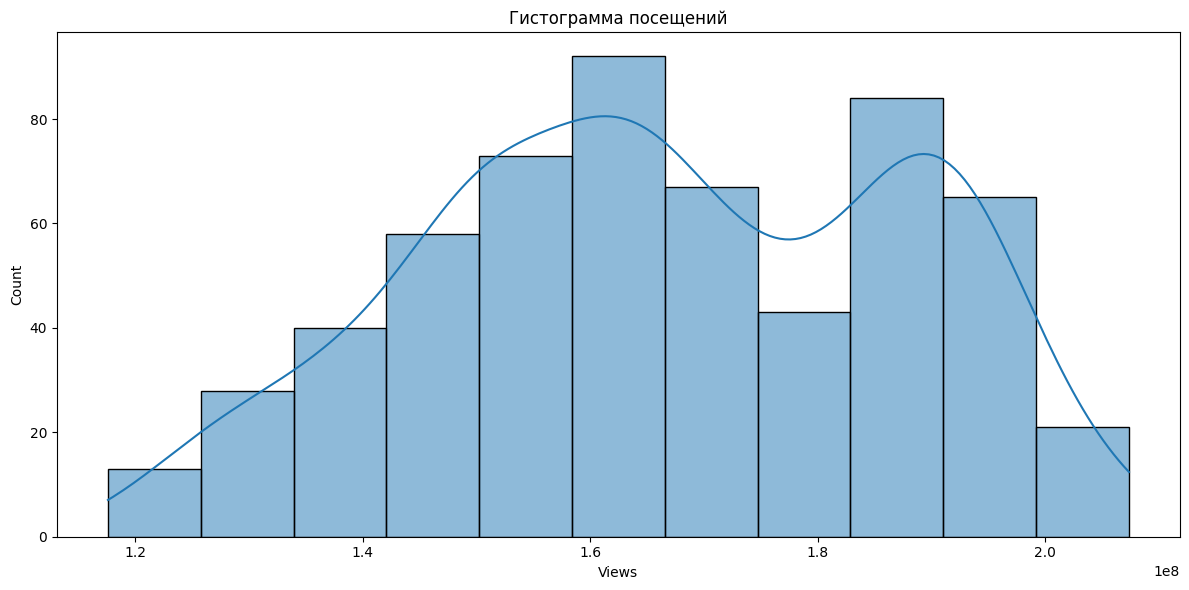

In [48]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(data['Views'],kde = True)
plt.title('Гистограмма посещений')
plt.tight_layout()
plt.show()


p-value: 0.0000


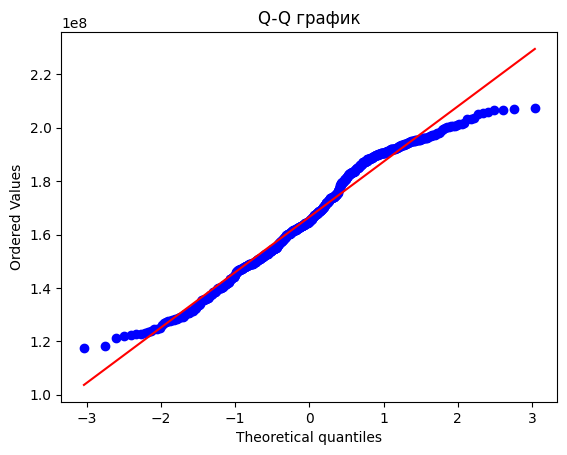

In [50]:
from scipy import stats

# Тест Шапиро-Уилка
stat, p = stats.shapiro(data['Views'])
print(f"p-value: {p:.4f}")  # p > 0.05 → нормальное распределение

# Q-Q plot
stats.probplot(data['Views'], plot=plt)
plt.title('Q-Q график')
plt.show()

In [ ]:
Q-Q графи показывает тяжелые концы, что указывает на не нормальность остатков.

              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day
Время                                                                      
2023-07-09  78448465     0.373878  130654529     0.622687  2023      7    9
2023-07-10  92333856     0.367624  157991251     0.629037  2023      7   10
2023-07-11  92038599     0.367547  157537418     0.629110  2023      7   11
2023-07-12  91273579     0.366105  157177031     0.630448  2023      7   12
2023-07-13  89284018     0.364924  154516800     0.631545  2023      7   13


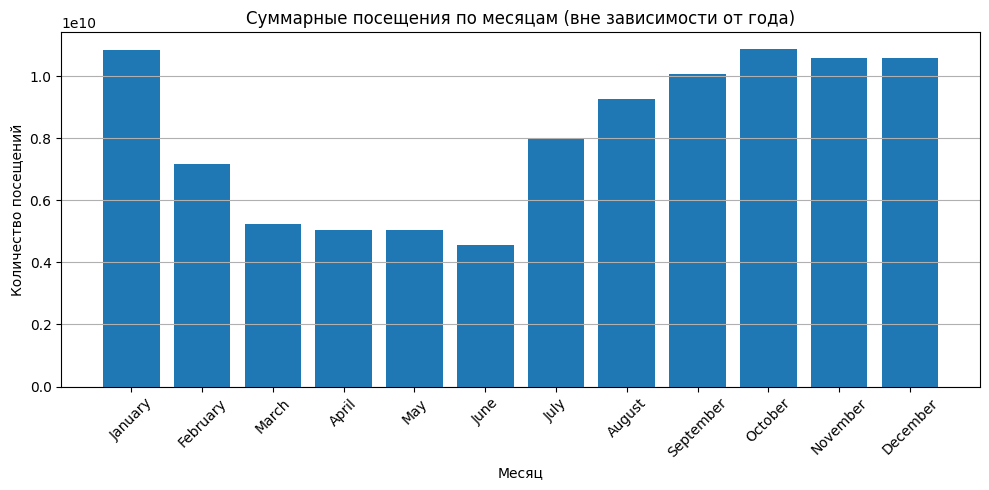

In [51]:
data.index = pd.to_datetime(data.index)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
print(data.head())

# Устанавливаем русскую локаль для отображения месяцев
try:
    locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
except:
    pass  # если не получится — названия будут на английском


data['Month'] = data.index.month

# Группируем по месяцу, независимо от года, и суммируем просмотры
monthly_total = data.groupby('Month')['Views'].sum()


month_names = pd.to_datetime(monthly_total.index, format='%m').strftime('%B')

plt.figure(figsize=(10, 5))
plt.bar(month_names, monthly_total.values)
plt.title('Суммарные посещения по месяцам (вне зависимости от года)')
plt.xlabel('Месяц')
plt.ylabel('Количество посещений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Наибольшие просмотры с июля по январь

              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day  \
Время                                                                         
2023-07-09  78448465     0.373878  130654529     0.622687  2023      7    9   
2023-07-10  92333856     0.367624  157991251     0.629037  2023      7   10   
2023-07-11  92038599     0.367547  157537418     0.629110  2023      7   11   
2023-07-12  91273579     0.366105  157177031     0.630448  2023      7   12   
2023-07-13  89284018     0.364924  154516800     0.631545  2023      7   13   

            DayOfYear  WeekOfYear  DayOfWeek  IsWeekend  
Время                                                    
2023-07-09        190          27     Sunday          1  
2023-07-10        191          28     Monday          0  
2023-07-11        192          28    Tuesday          0  
2023-07-12        193          28  Wednesday          0  
2023-07-13        194          28   Thursday          0  


<Figure size 1000x600 with 0 Axes>

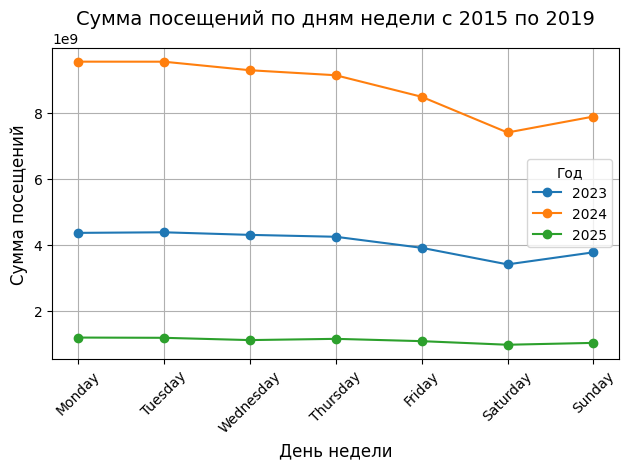

In [52]:
data['DayOfYear'] = data.index.dayofyear
data['WeekOfYear'] = data.index.isocalendar().week.astype(int)
data['DayOfWeek'] = data.index.dayofweek 
data['IsWeekend'] = (data['DayOfWeek'] >= 5).astype(int)


data['DayOfWeek'] = data.index.day_name()
print(data.head())
weekly_views = data.groupby(['Year', 'DayOfWeek'])['Views'].sum().reset_index()

# Убедимся, что дни недели идут в правильном порядке
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_views['DayOfWeek'] = pd.Categorical(weekly_views['DayOfWeek'], categories=days_order, ordered=True)
weekly_views = weekly_views.sort_values(['Year', 'DayOfWeek'])

pivot_df = weekly_views.pivot(index='DayOfWeek', columns='Year', values='Views')
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o')


plt.title('Сумма посещений по дням недели с 2015 по 2019', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Сумма посещений', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Год")
plt.tight_layout()
plt.show()

In [53]:
print(data.tail())

              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day  \
Время                                                                         
2025-02-07  89436201     0.325604  184376241     0.671245  2025      2    7   
2025-02-08  79122275     0.328271  161089000     0.668343  2025      2    8   
2025-02-09  84102918     0.324524  174233550     0.672308  2025      2    9   
2025-02-10  98672183     0.321672  207112092     0.675187  2025      2   10   
2025-02-11  97031354     0.322237  203158053     0.674679  2025      2   11   

            DayOfYear  WeekOfYear DayOfWeek  IsWeekend  
Время                                                   
2025-02-07         38           6    Friday          0  
2025-02-08         39           6  Saturday          1  
2025-02-09         40           6    Sunday          1  
2025-02-10         41           7    Monday          0  
2025-02-11         42           7   Tuesday          0  


In [54]:
import holidays
import pandas as pd

# Создаем календарь праздников
ru_holidays = holidays.RU(years=data.index.year.unique())

# Добавляем бинарный столбец праздника (1/0)
data['is_holiday'] = data.index.to_series().apply(lambda x: 1 if x in ru_holidays else 0)

# Добавляем столбец с названием праздника
data['holiday_name'] = data.index.to_series().apply(lambda x: ru_holidays.get(x, None))

# Создаем словарь весов праздников
holiday_weights = {
    'Новый год': 1.0,
    'Новогодние каникулы': 0.9,
    'Рождество Христово': 0.8,
    'День защитника Отечества': 0.7,
    'Международный женский день': 0.6,
    'Праздник Весны и Труда': 0.5,
    'День Победы': 0.4,
    'День России': 0.3,
    'День народного единства': 0.2
}

def get_holiday_weight(date, holiday_name):
    # Проверяем 30 и 31 декабря
    if (date.month == 12) and (date.day == 30):
        return 0.8
    if (date.month == 12) and (date.day == 31):
        return 0.8
    if (date.month == 1) and (date.day == 1):
        return 1
    
    # Проверяем обычные праздники
    if holiday_name is None:
        return 0.0
    for holiday, weight in holiday_weights.items():
        if holiday in str(holiday_name):
            return weight
    return 0.5

data['holiday_weight'] = [get_holiday_weight(date, name) for date, name in zip(data.index, data['holiday_name'])]


weekday_weights = {
    0: 0.1,  # Понедельник
    1: 0.2,  # Вторник
    2: 0.3,  # Среда
    3: 0.4,  # Четверг
    4: 0.5,  # Пятница
    5: 0.8,  # Суббота
    6: 0.9   # Воскресенье
}

# Добавляем столбец с весом дня недели
data['weekday_weight'] = data['DayOfWeek'].map(weekday_weights)

# One-Hot Encoding для праздников (1/0 вместо True/False)
one_hot_encoded_holidays = pd.get_dummies(data['holiday_name']).astype(int)

# One-Hot Encoding для дня недели (DayOfWeek)
one_hot_encoded_days = pd.get_dummies(data['DayOfWeek'], prefix='Day').astype(int)

data = pd.concat([data, one_hot_encoded_holidays, one_hot_encoded_days], axis=1)

print(data.head())

              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day  \
Время                                                                         
2023-07-09  78448465     0.373878  130654529     0.622687  2023      7    9   
2023-07-10  92333856     0.367624  157991251     0.629037  2023      7   10   
2023-07-11  92038599     0.367547  157537418     0.629110  2023      7   11   
2023-07-12  91273579     0.366105  157177031     0.630448  2023      7   12   
2023-07-13  89284018     0.364924  154516800     0.631545  2023      7   13   

            DayOfYear  WeekOfYear  DayOfWeek  ...  Новогодние каникулы  \
Время                                         ...                        
2023-07-09        190          27     Sunday  ...                    0   
2023-07-10        191          28     Monday  ...                    0   
2023-07-11        192          28    Tuesday  ...                    0   
2023-07-12        193          28  Wednesday  ...                    0   
20

In [55]:

weekday_weights = {
    0: 0.1,  # Понедельник
    1: 0.2,  # Вторник
    2: 0.3,  # Среда
    3: 0.4,  # Четверг
    4: 0.5,  # Пятница
    5: 0.8,  # Суббота
    6: 0.9   # Воскресенье
}


if data['DayOfWeek'].dtype == object:
    day_mapping = {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    }
    data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping)

# Добавляем столбец с весом дня недели
data['weekday_weight'] = data['DayOfWeek'].map(weekday_weights)


print("Пропуски в weekday_weight:", data['weekday_weight'].isna().sum())
print(data[['DayOfWeek', 'weekday_weight']].head(10))

Пропуски в weekday_weight: 0
            DayOfWeek  weekday_weight
Время                                
2023-07-09          6             0.9
2023-07-10          0             0.1
2023-07-11          1             0.2
2023-07-12          2             0.3
2023-07-13          3             0.4
2023-07-14          4             0.5
2023-07-15          5             0.8
2023-07-16          6             0.9
2023-07-17          0             0.1
2023-07-18          1             0.2


In [56]:
print(data.holiday_weight.loc['2023-12-31':'2024-01-05'])

Время
2023-12-31    0.8
2024-01-01    1.0
2024-01-02    0.9
2024-01-03    0.9
2024-01-04    0.9
2024-01-05    0.9
Name: holiday_weight, dtype: float64


ADF-значение = -2.3176769911854618 и меньше критического для Views  False 1% % =  -3.4419977165341673
ADF-значение = -2.3176769911854618 и меньше критического для Views  False 5% % =  -2.866678179017994
ADF-значение = -2.3176769911854618 и меньше критического для Views  False 10% % =  -2.5695064902419396

ADF-значение = -8.579774019179823 и меньше критического для First Diff  True 1% % =  -3.4419977165341673
ADF-значение = -8.579774019179823 и меньше критического для First Diff  True 5% % =  -2.866678179017994
ADF-значение = -8.579774019179823 и меньше критического для First Diff  True 10% % =  -2.5695064902419396


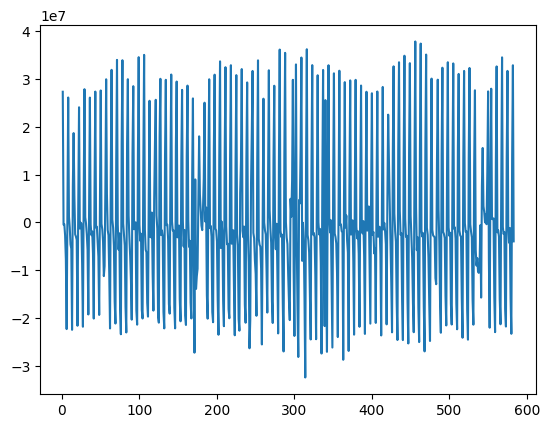

              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day  \
Время                                                                         
2023-07-10  92333856     0.367624  157991251     0.629037  2023      7   10   
2023-07-11  92038599     0.367547  157537418     0.629110  2023      7   11   
2023-07-12  91273579     0.366105  157177031     0.630448  2023      7   12   
2023-07-13  89284018     0.364924  154516800     0.631545  2023      7   13   
2023-07-14  86514999     0.369482  146812698     0.626996  2023      7   14   

            DayOfYear  WeekOfYear  DayOfWeek  ...  Рождество Христово  \
Время                                         ...                       
2023-07-10        191          28          0  ...                   0   
2023-07-11        192          28          1  ...                   0   
2023-07-12        193          28          2  ...                   0   
2023-07-13        194          28          3  ...                   0   
2023-07-

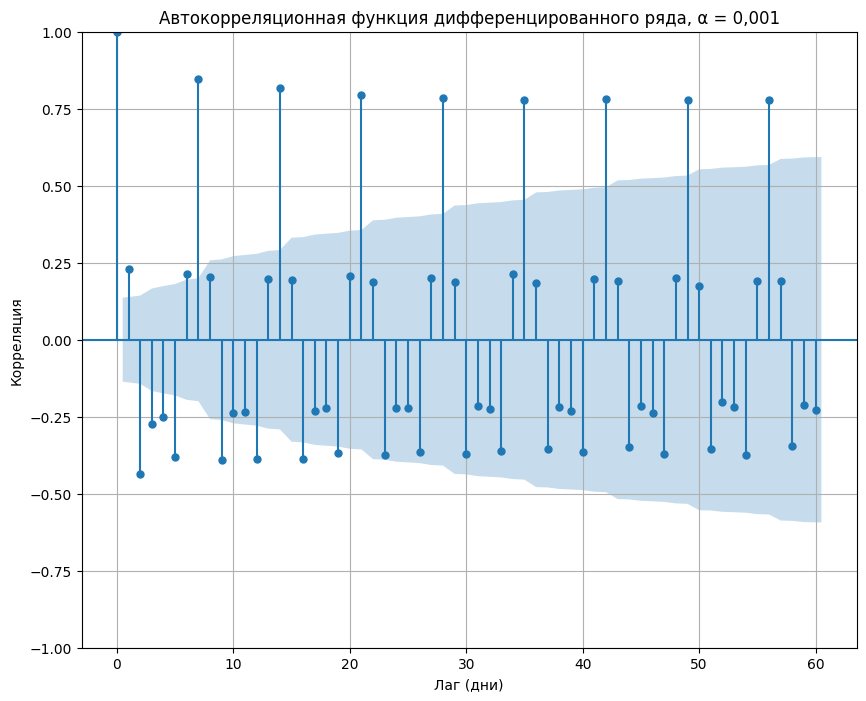

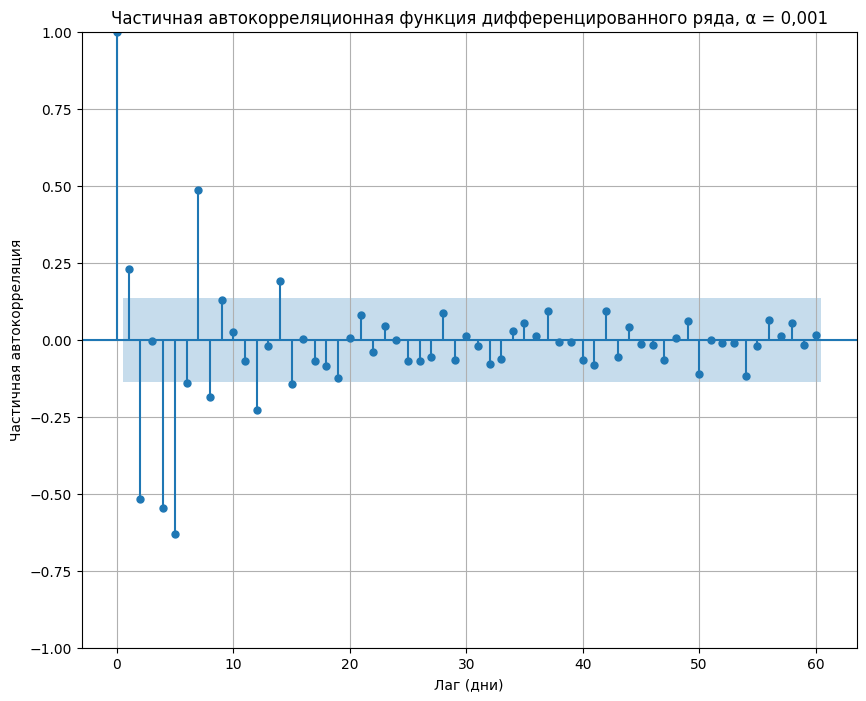

In [57]:
from statsmodels.tsa.stattools import adfuller
data['Time numeric'] = (data.index - data.index.min()).days

ADFTest = adfuller(data['Views'])
ADF = ADFTest[0]
pValue = ADFTest[1]
for crit, critValue in ADFTest[4].items():
    print(f"ADF-значение = {ADF} и меньше критического для Views ", ADF < critValue, crit, "% = ", critValue)
print()
data['First Diff'] = data['Views'].diff()
ADFTest = adfuller(data['First Diff'].dropna())
ADF = ADFTest[0]
pValue = ADFTest[1]
for crit, critValue in ADFTest[4].items():
    print(f"ADF-значение = {ADF} и меньше критического для First Diff ", ADF < critValue, crit, "% = ", critValue)
data = data.dropna(subset = ['First Diff'])
y = data['First Diff']
plt.plot(data['Time numeric'],y)
plt.show()
print(data.head())

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(y, lags=60, alpha=0.001, ax=ax, title='Автокорреляционная функция дифференцированного ряда, α = 0,001')
ax.set_xlabel('Лаг (дни)')
ax.set_ylabel('Корреляция')
ax.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(y, lags=60, alpha=0.001,ax=ax, title='Частичная автокорреляционная функция дифференцированного ряда, α = 0,001')
plt.xlabel('Лаг (дни)')
plt.ylabel('Частичная автокорреляция')
plt.grid(True)
plt.show()

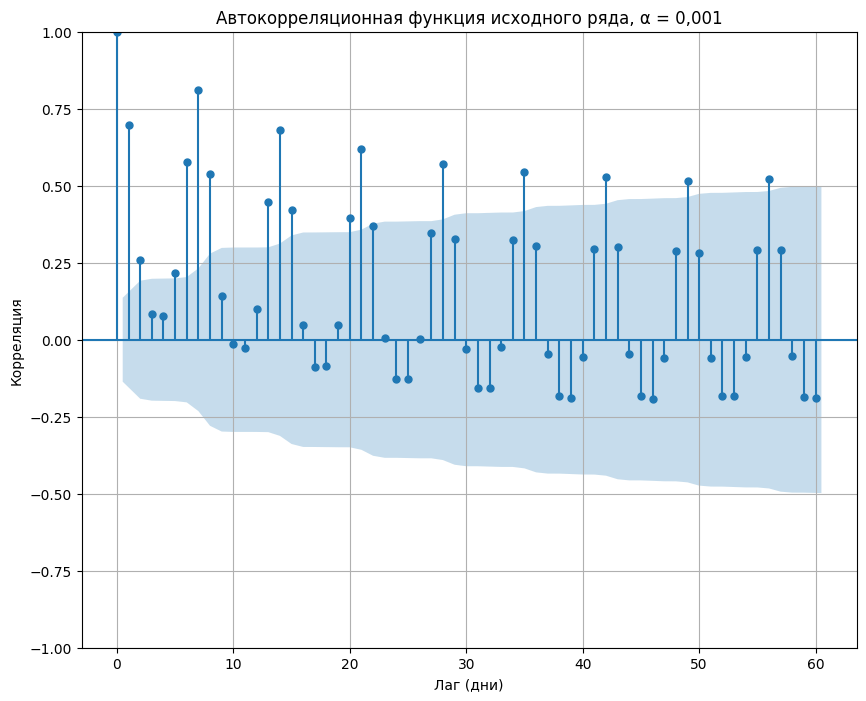

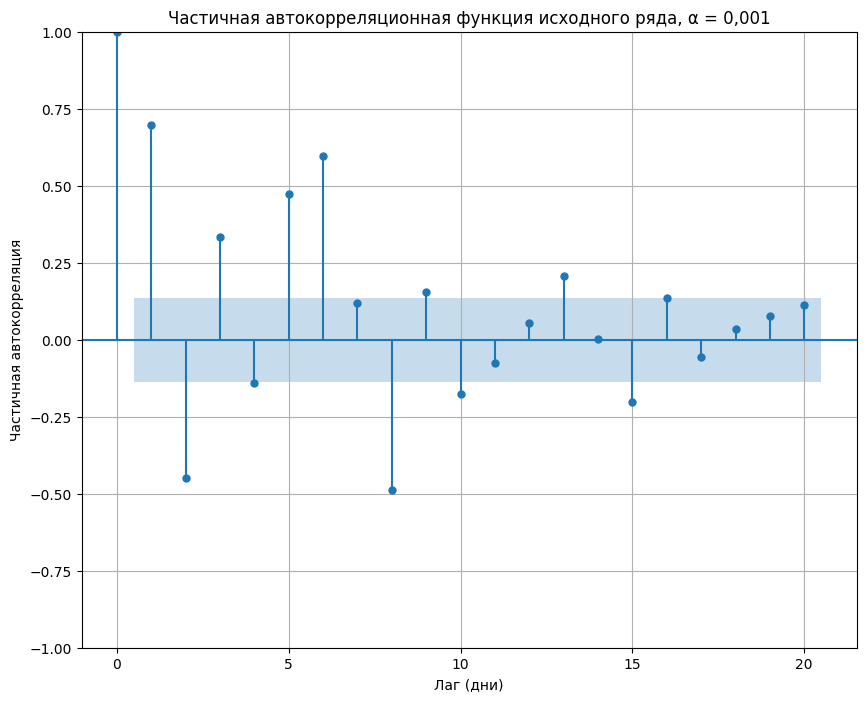

In [58]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(data['Views'], lags=60, alpha=0.001, ax=ax, title='Автокорреляционная функция исходного ряда, α = 0,001')
ax.set_xlabel('Лаг (дни)')
ax.set_ylabel('Корреляция')
ax.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(data['Views'], lags=20, alpha=0.001,ax=ax, title='Частичная автокорреляционная функция исходного ряда, α = 0,001')
plt.xlabel('Лаг (дни)')
plt.ylabel('Частичная автокорреляция')
plt.grid(True)
plt.show()

In [59]:
with pd.option_context('display.max_columns', None):  # None означает "без ограничений"
    display(data)  # или print(df)

,Google,Google Доля,Views,Яндекс Доля,Year,Month,Day,DayOfYear,WeekOfYear,DayOfWeek,IsWeekend,is_holiday,holiday_name,holiday_weight,weekday_weight,Выходной (перенесено с 02.11.2024),Выходной (перенесено с 04.11.2023),Выходной (перенесено с 06.01.2024),Выходной (перенесено с 07.01.2024),Выходной (перенесено с 27.04.2024),Выходной (перенесено с 28.12.2024),День Победы,День России,День защитника Отечества,День народного единства,Международный женский день,Новогодние каникулы,Праздник Весны и Труда,Рождество Христово,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Time numeric,First Diff
Время,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-10,92333856,0.367624,157991251,0.629037,2023,7,10,191,28,0,0,0,None,0.0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,27336722.0
2023-07-11,92038599,0.367547,157537418,0.629110,2023,7,11,192,28,1,0,0,None,0.0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,-453833.0
2023-07-12,91273579,0.366105,157177031,0.630448,2023,7,12,193,28,2,0,0,None,0.0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,-360387.0
2023-07-13,89284018,0.364924,154516800,0.631545,2023,7,13,194,28,3,0,0,None,0.0,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,-2660231.0
2023-07-14,86514999,0.369482,146812698,0.626996,2023,7,14,195,28,4,0,0,None,0.0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,-7704102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07,89436201,0.325604,184376241,0.671245,2025,2,7,38,6,4,0,0,None,0.0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,579,-15897763.0
2025-02-08,79122275,0.328271,161089000,0.668343,2025,2,8,39,6,5,1,0,None,0.0,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,580,-23287241.0
2025-02-09,84102918,0.324524,174233550,0.672308,2025,2,9,40,6,6,1,0,None,0.0,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,581,13144550.0


In [60]:
def is_leap_year(year):
    if (year % 400 == 0) or (year % 100 != 0 and year % 4 == 0):
        return True
    return False

# Обработка временных признаков
data['Year'] = data['Year'] - data['Year'].min()  # Например, 2015 → 0, 2016 → 1
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# Исправление: используем .days_in_month напрямую, если индекс - DatetimeIndex
data['days_in_month'] = data.index.days_in_month  # Убрали .dt для DatetimeIndex
data['Day_sin'] = np.sin(2 * np.pi * data['Day'] / data['days_in_month'])
data['Day_cos'] = np.cos(2 * np.pi * data['Day'] / data['days_in_month'])
# Создаем гармоники с учетом високосных годов
data['DayOfYear_sin'] = np.sin(2 * np.pi * data['DayOfYear'] / 
                               np.where(data['Year'].apply(is_leap_year), 366, 365))
                               
data['DayOfYear_cos'] = np.cos(2 * np.pi * data['DayOfYear'] / 
                               np.where(data['Year'].apply(is_leap_year), 366, 365))

data['WeekOfYear_sin'] = np.sin(2 * np.pi * data['WeekOfYear'] / 52)
data['WeekOfYear_cos'] = np.cos(2 * np.pi * data['WeekOfYear'] / 52)

# # Удаление ненужных столбцов


data

,Google,Google Доля,Views,Яндекс Доля,Year,Month,Day,DayOfYear,WeekOfYear,DayOfWeek,...,First Diff,Month_sin,Month_cos,days_in_month,Day_sin,Day_cos,DayOfYear_sin,DayOfYear_cos,WeekOfYear_sin,WeekOfYear_cos
Время,,,,,,,,,,,,,,,,,,,,,
2023-07-10,92333856,0.367624,157991251,0.629037,0,7,10,191,28,0,...,27336722.0,-0.500000,-0.866025,31,0.897805,-4.403942e-01,-0.136906,-0.990584,-0.239316,-0.970942
2023-07-11,92038599,0.367547,157537418,0.629110,0,7,11,192,28,1,...,-453833.0,-0.500000,-0.866025,31,0.790776,-6.121060e-01,-0.153891,-0.988088,-0.239316,-0.970942
2023-07-12,91273579,0.366105,157177031,0.630448,0,7,12,193,28,2,...,-360387.0,-0.500000,-0.866025,31,0.651372,-7.587581e-01,-0.170830,-0.985301,-0.239316,-0.970942
2023-07-13,89284018,0.364924,154516800,0.631545,0,7,13,194,28,3,...,-2660231.0,-0.500000,-0.866025,31,0.485302,-8.743466e-01,-0.187719,-0.982223,-0.239316,-0.970942
2023-07-14,86514999,0.369482,146812698,0.626996,0,7,14,195,28,4,...,-7704102.0,-0.500000,-0.866025,31,0.299363,-9.541393e-01,-0.204552,-0.978856,-0.239316,-0.970942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07,89436201,0.325604,184376241,0.671245,2,2,7,38,6,4,...,-15897763.0,0.866025,0.500000,28,1.000000,6.123234e-17,0.608477,0.793572,0.663123,0.748511
2025-02-08,79122275,0.328271,161089000,0.668343,2,2,8,39,6,5,...,-23287241.0,0.866025,0.500000,28,0.974928,-2.225209e-01,0.622047,0.782980,0.663123,0.748511
2025-02-09,84102918,0.324524,174233550,0.672308,2,2,9,40,6,6,...,13144550.0,0.866025,0.500000,28,0.900969,-4.338837e-01,0.635432,0.772157,0.663123,0.748511


In [61]:
from sklearn.preprocessing import StandardScaler
# Разделение на train/test (уже масштабированные)
scaler = StandardScaler()
int_train_test = int(len(data)*0.85)
train_data = data.iloc[0:int_train_test]
test_data = data.iloc[int_train_test::]
# Масштабируем ТРЕНИРОВОЧНЫЕ данные и подгоняем scaler
train_data['Views_normalized'] = scaler.fit_transform(train_data[['Views']])
y_train = train_data['Views_normalized'] # Это для обучения

# Масштабируем ТЕСТОВЫЕ данные ТЕМ ЖЕ scaler'ом (только transform!)
test_data['Views_normalized'] = scaler.transform(test_data[['Views']])
y_test = test_data['Views_normalized'] # Это для eval_set

# Сохраняем оригинальный y_test для финальной оценки
y_test_original = test_data['Views']

X_train = train_data.drop(['Views_normalized', 'Views'], axis=1)
X_test = test_data.drop(['Views_normalized', 'Views'], axis=1)
y_train = y_train.asfreq('D')  # 'D' — дневная частота (если данные ежедневные)
y_test = y_test.asfreq('D')

y_full = pd.concat([y_train, y_test])
data = pd.concat([data, y_full], axis=1)


C:\Users\PC\AppData\Local\Temp\ipykernel_7804\3869547686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Views_normalized'] = scaler.fit_transform(train_data[['Views']])
C:\Users\PC\AppData\Local\Temp\ipykernel_7804\3869547686.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Views_normalized'] = scaler.transform(test_data[['Views']])


Отображение тренда после начального заполнения NaN (до экстраполяции и масштабирования)...


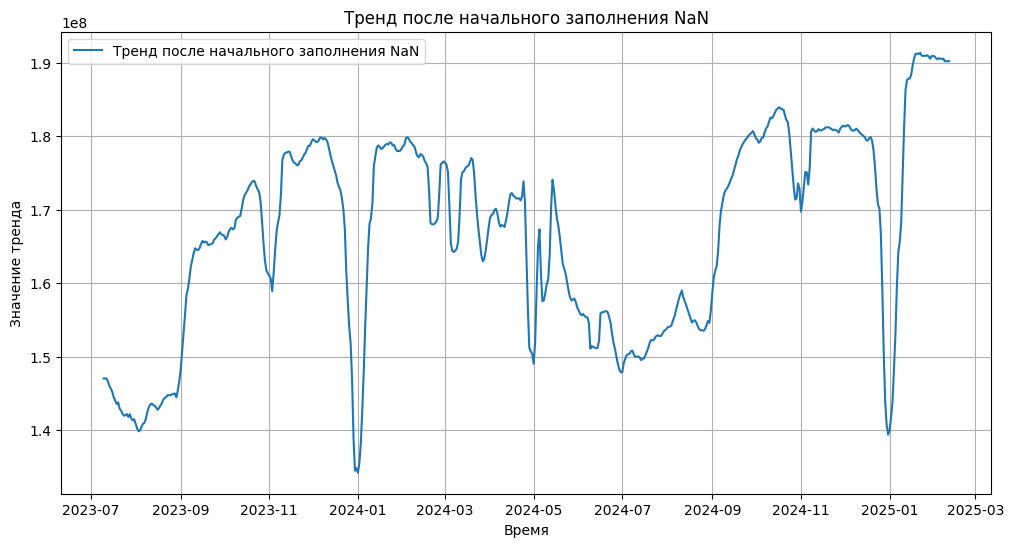

Параметры линейной регрессии для экстраполяции: Наклон (slope) = 24307.1136, Пересечение (intercept) = 158453466.8264
Экстраполяция тренда для тестовой части (линейная регрессия по трейн) завершена.

Пропуски в data['trend'] после всех операций: 0
Первые 5 значений масштабированного тренда в data:
Время
2023-07-10   -1.383928
2023-07-11   -1.383928
2023-07-12   -1.383928
2023-07-13   -1.418401
2023-07-14   -1.466535
Name: trend, dtype: float64
Последние 5 значений масштабированного тренда в data:
Время
2025-02-07    0.638876
2025-02-08    0.640806
2025-02-09    0.642736
2025-02-10    0.644666
2025-02-11    0.646596
Name: trend, dtype: float64


In [62]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress 


original_trend_series = result_mul.trend.copy()

# Конвертируем индекс original_trend_series в DatetimeIndex, если он еще не такой
if not isinstance(original_trend_series.index, pd.DatetimeIndex):
    original_trend_series.index = pd.to_datetime(original_trend_series.index, errors='coerce')
    original_trend_series = original_trend_series[original_trend_series.index.notna()]

# Выравниваем original_trend_series по индексу data (reindex)
trend_series_aligned = original_trend_series.reindex(data.index)

# --- Шаг 1: Добавление выровненного тренда в DataFrame 'data' и начальное заполнение NaN ---
data['trend'] = trend_series_aligned
data['trend'] = data['trend'].interpolate(method='linear') # Линейная интерполяция
data['trend'] = data['trend'].bfill().ffill() # Заполнение на концах

# Визуализация тренда после начального заполнения NaN
print("Отображение тренда после начального заполнения NaN (до экстраполяции и масштабирования)...")
plt.figure(figsize=(12, 6)) # Опционально: задаем размер графика
plt.plot(data.index, data['trend'], label='Тренд после начального заполнения NaN')
plt.title('Тренд после начального заполнения NaN')
plt.xlabel('Время')
plt.ylabel('Значение тренда')
plt.legend()
plt.grid(True)
plt.show()

# --- Шаг 2: Определение точки разделения ---
split_pos = int(len(data) * 0.85)

# --- Шаг 3: Экстраполяция тренда для тестовой части ---
# Используем линейную регрессию по доступным данным тренировочного тренда
train_trend_for_extrapolation = data['trend'].iloc[:split_pos].dropna()

if len(train_trend_for_extrapolation) >= 2:
    # Создаем независимую переменную (порядковый номер) для регрессии
    x_fit = np.arange(len(train_trend_for_extrapolation))
    y_fit = train_trend_for_extrapolation.values
    
    # Строим модель линейной регрессии
    slope, intercept, r_value, p_value, std_err = linregress(x_fit, y_fit)
    
    print(f"Параметры линейной регрессии для экстраполяции: Наклон (slope) = {slope:.4f}, Пересечение (intercept) = {intercept:.4f}")

    num_test_points = len(data) - split_pos
    x_extrapolate_values = np.arange(len(train_trend_for_extrapolation), len(train_trend_for_extrapolation) + num_test_points)
    
    extrapolated_test_values = intercept + slope * x_extrapolate_values
    
    data.loc[data.index[split_pos:], 'trend'] = extrapolated_test_values
    print("Экстраполяция тренда для тестовой части (линейная регрессия по трейн) завершена.")

elif len(train_trend_for_extrapolation) == 1: # Если только одна точка в трейне (после dropna)
    last_known_train_trend_val = train_trend_for_extrapolation.iloc[0]
    print(f"Только одна точка ({last_known_train_trend_val}) в обучающем тренде для экстраполяции. "
          "Тестовая часть тренда будет заполнена этим значением (константная экстраполяция).")
    data.loc[data.index[split_pos:], 'trend'] = last_known_train_trend_val
else: # Если обучающий тренд пуст или весь NaN после начального заполнения
    print("ПРЕДУПРЕЖДЕНИЕ: Обучающий тренд пуст или содержит только NaN после начального заполнения. "
          "Экстраполяция не будет выполнена. "
          "Значения в тестовой части останутся после начального bfill/ffill (и будут обработаны финальным заполнением).")


# --- Шаг 4: Финальное заполнение NaN в 'trend' (на случай, если что-то осталось) ---
# Это особенно важно, если result_mul.trend был полностью NaN или экстраполяция не удалась
if data['trend'].isnull().any():

    data['trend'] = data['trend'].ffill().bfill() 
    if data['trend'].isnull().any():
        data['trend'].fillna(0, inplace=True) 

# --- Шаг 5: Масштабирование столбца 'trend' с помощью НОВОГО StandardScaler ---
trend_scaler = StandardScaler()


train_trend_values = data['trend'].iloc[:split_pos].values.reshape(-1, 1)
test_trend_values = data['trend'].iloc[split_pos:].values.reshape(-1, 1)

data.iloc[:split_pos, data.columns.get_loc('trend')] = trend_scaler.fit_transform(train_trend_values).flatten()

# Трансформируем ТЕСТОВУЮ часть тренда ТЕМ ЖЕ обученным scaler'ом
if len(test_trend_values) > 0: 
    data.iloc[split_pos:, data.columns.get_loc('trend')] = trend_scaler.transform(test_trend_values).flatten()


print(f"\nПропуски в data['trend'] после всех операций: {data['trend'].isna().sum()}")
print("Первые 5 значений масштабированного тренда в data:")
print(data['trend'].head())
print("Последние 5 значений масштабированного тренда в data:")
print(data['trend'].tail())



DatetimeIndex(['2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13',
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-19',
               ...
               '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09',
               '2024-11-10', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15'],
              dtype='datetime64[ns]', name='Время', length=495, freq=None)


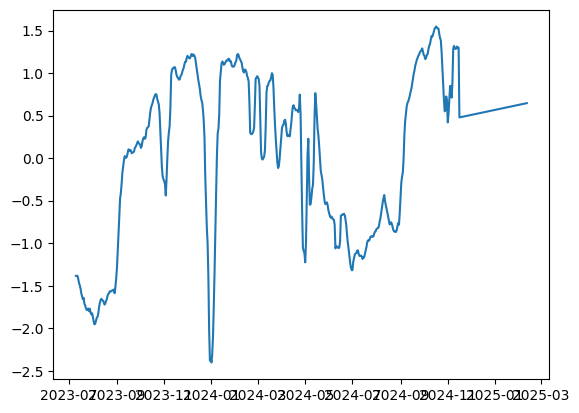

In [64]:
plt.plot(data.trend)
plt.show()

In [65]:
def create_lagged_features(data, lags):
    for lag in lags:
        data[f'Views_lag_{lag}'] = data['Views_normalized'].shift(lag)
    return data


lags = [35,42,49,365]
max_lag = max(lags)
data = create_lagged_features(data.copy(), lags)

print(data.head())




              Google  Google Доля      Views  Яндекс Доля  Year  Month  Day  \
Время                                                                         
2023-07-10  92333856     0.367624  157991251     0.629037     0      7   10   
2023-07-11  92038599     0.367547  157537418     0.629110     0      7   11   
2023-07-12  91273579     0.366105  157177031     0.630448     0      7   12   
2023-07-13  89284018     0.364924  154516800     0.631545     0      7   13   
2023-07-14  86514999     0.369482  146812698     0.626996     0      7   14   

            DayOfYear  WeekOfYear  DayOfWeek  ...  DayOfYear_sin  \
Время                                         ...                  
2023-07-10        191          28          0  ...      -0.136906   
2023-07-11        192          28          1  ...      -0.153891   
2023-07-12        193          28          2  ...      -0.170830   
2023-07-13        194          28          3  ...      -0.187719   
2023-07-14        195          28     

In [66]:

int_train_test = int(len(data)*0.95)
train_data = data.iloc[max_lag:int_train_test]
test_data = data.iloc[int_train_test::]
y_train = train_data['Views_normalized']
y_test = test_data['Views_normalized']
# Масштабируем ТРЕНИРОВОЧНЫЕ данные и подгоняем scaler

X_train = train_data.drop(['Views_normalized', 'Views'], axis=1)
X_test = test_data.drop(['Views_normalized', 'Views'], axis=1)


In [67]:
with pd.option_context('display.max_columns', None):  # None означает "без ограничений"
    display(data)  # или print(df)

,Google,Google Доля,Views,Яндекс Доля,Year,Month,Day,DayOfYear,WeekOfYear,DayOfWeek,IsWeekend,is_holiday,holiday_name,holiday_weight,weekday_weight,Выходной (перенесено с 02.11.2024),Выходной (перенесено с 04.11.2023),Выходной (перенесено с 06.01.2024),Выходной (перенесено с 07.01.2024),Выходной (перенесено с 27.04.2024),Выходной (перенесено с 28.12.2024),День Победы,День России,День защитника Отечества,День народного единства,Международный женский день,Новогодние каникулы,Праздник Весны и Труда,Рождество Христово,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Time numeric,First Diff,Month_sin,Month_cos,days_in_month,Day_sin,Day_cos,DayOfYear_sin,DayOfYear_cos,WeekOfYear_sin,WeekOfYear_cos,Views_normalized,trend,Views_lag_35,Views_lag_42,Views_lag_49,Views_lag_365
Время,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-10,92333856,0.367624,157991251,0.629037,0,7,10,191,28,0,0,0,None,0.0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,27336722.0,-0.500000,-0.866025,31,0.897805,-4.403942e-01,-0.136906,-0.990584,-0.239316,-0.970942,-0.326188,-1.383928,NaN,NaN,NaN,NaN
2023-07-11,92038599,0.367547,157537418,0.629110,0,7,11,192,28,1,0,0,None,0.0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,-453833.0,-0.500000,-0.866025,31,0.790776,-6.121060e-01,-0.153891,-0.988088,-0.239316,-0.970942,-0.348809,-1.383928,NaN,NaN,NaN,NaN
2023-07-12,91273579,0.366105,157177031,0.630448,0,7,12,193,28,2,0,0,None,0.0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,-360387.0,-0.500000,-0.866025,31,0.651372,-7.587581e-01,-0.170830,-0.985301,-0.239316,-0.970942,-0.366772,-1.383928,NaN,NaN,NaN,NaN
2023-07-13,89284018,0.364924,154516800,0.631545,0,7,13,194,28,3,0,0,None,0.0,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,-2660231.0,-0.500000,-0.866025,31,0.485302,-8.743466e-01,-0.187719,-0.982223,-0.239316,-0.970942,-0.499370,-1.418401,NaN,NaN,NaN,NaN
2023-07-14,86514999,0.369482,146812698,0.626996,0,7,14,195,28,4,0,0,None,0.0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,-7704102.0,-0.500000,-0.866025,31,0.299363,-9.541393e-01,-0.204552,-0.978856,-0.239316,-0.970942,-0.883375,-1.466535,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-07,89436201,0.325604,184376241,0.671245,2,2,7,38,6,4,0,0,None,0.0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,579,-15897763.0,0.866025,0.500000,28,1.000000,6.123234e-17,0.608477,0.793572,0.663123,0.748511,0.988952,0.638876,-0.743247,-0.298095,0.424127,1.122582
2025-02-08,79122275,0.328271,161089000,0.668343,2,2,8,39,6,5,1,0,None,0.0,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,580,-23287241.0,0.866025,0.500000,28,0.974928,-2.225209e-01,0.622047,0.782980,0.663123,0.748511,-0.171783,0.640806,-0.634650,-0.823871,-0.641523,0.219185
2025-02-09,84102918,0.324524,174233550,0.672308,2,2,9,40,6,6,1,0,None,0.0,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,581,13144550.0,0.866025,0.500000,28,0.900969,-4.338837e-01,0.635432,0.772157,0.663123,0.748511,0.483397,0.642736,-0.633812,-1.255718,-0.057172,-0.779678


In [68]:
X_train

,Google,Google Доля,Яндекс Доля,Year,Month,Day,DayOfYear,WeekOfYear,DayOfWeek,IsWeekend,...,Day_cos,DayOfYear_sin,DayOfYear_cos,WeekOfYear_sin,WeekOfYear_cos,trend,Views_lag_35,Views_lag_42,Views_lag_49,Views_lag_365
Время,,,,,,,,,,,,,,,,,,,,,
2024-07-09,85645242,0.346995,0.649362,1,7,9,191,28,1,0,...,-0.250653,-0.145799,-0.989314,-0.239316,-0.970942,-1.126843,0.189314,0.329295,0.726710,-0.326188
2024-07-10,86380632,0.346840,0.649376,1,7,10,192,28,2,0,...,-0.440394,-0.162807,-0.986658,-0.239316,-0.970942,-1.149376,0.063183,0.220257,0.539973,-0.348809
2024-07-11,83925997,0.345623,0.650685,1,7,11,193,28,3,0,...,-0.612106,-0.179767,-0.983709,-0.239316,-0.970942,-1.149183,-0.003947,0.064646,0.226658,-0.366772
2024-07-12,80556653,0.345557,0.650702,1,7,12,194,28,4,0,...,-0.758758,-0.196673,-0.980469,-0.239316,-0.970942,-1.144822,-0.428198,-0.489530,-0.534426,-0.499370
2024-07-13,67968250,0.351189,0.644942,1,7,13,195,28,5,1,...,-0.874347,-0.213521,-0.976938,-0.239316,-0.970942,-1.156951,-1.794782,-1.706771,-1.754305,-0.883375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-08,80668039,0.328718,0.668144,2,1,8,8,2,2,0,...,-0.050649,0.137279,0.990532,0.239316,0.970942,0.580972,1.440906,1.467373,1.437454,0.924660
2025-01-09,93332799,0.326813,0.670117,2,1,9,9,2,3,0,...,-0.250653,0.154309,0.988023,0.239316,0.970942,0.582902,1.293595,1.298501,1.330402,0.933503
2025-01-10,90598662,0.329197,0.667612,2,1,10,10,2,4,0,...,-0.440394,0.171293,0.985220,0.239316,0.970942,0.584832,0.512437,0.449650,0.479742,1.089513


In [69]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 583 entries, 2023-07-10 to 2025-02-11
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Google                              583 non-null    int64  
 1   Google Доля                         583 non-null    float64
 2   Views                               583 non-null    int64  
 3   Яндекс Доля                         583 non-null    float64
 4   Year                                583 non-null    int32  
 5   Month                               583 non-null    int32  
 6   Day                                 583 non-null    int32  
 7   DayOfYear                           583 non-null    int32  
 8   WeekOfYear                          583 non-null    int32  
 9   DayOfWeek                           583 non-null    int64  
 10  IsWeekend                           583 non-null    int32  
 11  is_holiday                

In [70]:
from statsmodels.tsa.stattools import adfuller  

# ANSI escape codes for colors
GREEN = "\033[92m"
RED = "\033[91m"
RESET = "\033[0m"

def ADF_test(y, name):
    """ADF-тест со стилизованным и цветным выводом"""
    result = adfuller(y)
    p_value = result[1]
    
    is_stationary = p_value < 0.05
    
    print(f"\n=== ADF-тест ({name}) ===")
    print(f"p-value: {p_value:.4f}")
    print(f"ADF-статистика = {result[0]}")
    critical_values_str = str(result[4]) 
    print("критические значения = " + critical_values_str.replace("{", "").replace("}", ""))
    
    if is_stationary:
        print(f"{GREEN}✓ Ряд стационарен (отвергаем H0){RESET}")
        return ['ADF_test', True]
    else:
        print(f"{RED}⚠ Ряд нестационарен! (не отвергаем H0){RESET}")
        return ['ADF_test', False]

    print() # For a blank line after the test output

In [71]:
from scipy import stats
GREEN = "\033[92m"
RED = "\033[91m"
RESET = "\033[0m"
def t_mean_test(residuals, name):
    """t-тест среднего остатков со стилизованным и цветным выводом"""
    t_stat, p_value = stats.ttest_1samp(residuals, popmean=0)
    print(stats.ttest_1samp(residuals, popmean=0))
    no_bias = p_value >= 0.05 
    
    print(f"\n=== t-тест среднего ({name}) ===")
    print(f"p-value: {p_value:.4f}")
    print(f"t-статистика: {t_stat}")
    df = len(residuals) - 1  # степени свободы
    critical_values = {
        '1%': stats.t.ppf(1 - 0.01/2, df),
        '5%': stats.t.ppf(1 - 0.05/2, df),
        '10%': stats.t.ppf(1 - 0.10/2, df)
    }
    print(f"Критические значения: {critical_values}".replace("{","").replace("}","").replace("'","")) 
    if no_bias:
        print(f"{GREEN}✓ Смещение не обнаружено{RESET}")
        return ['t_mean_test', True]
    else: # Corresponds to "failed" or "warning"
        print(f"{RED}⚠ Обнаружено смещение!{RESET}")
        return ['t_mean_test', False]
    print()

In [72]:
t_mean_test(y_test,'y_test')

TtestResult(statistic=9.09349719521816, pvalue=5.444469846544694e-10, df=29)

=== t-тест среднего (y_test) ===
p-value: 0.0000
t-статистика: 9.09349719521816
Критические значения: 1%: 2.7563859036703344, 5%: 2.045229642132703, 10%: 1.6991270265334972
⚠ Обнаружено смещение!


['t_mean_test', False]

In [73]:
def Q_Q(residuals,name):
    stats.probplot(residuals, plot=plt)
    plt.title(f'Q-Q график остатков {name}')
    plt.show()

In [74]:
def acf_plot(residuals,name):
    fig, ax = plt.subplots(figsize=(10, 8))
    plot_acf(residuals, lags=10, alpha=0.05, ax=ax, title=f'Автокорреляционная функция остатков на {name} , α = 0,05')
    ax.set_xlabel('Лаг (дни)')
    ax.set_ylabel('Корреляция')
    ax.grid(True)
    plt.show()

def pacf_plot(residuals,name):
    fig, ax = plt.subplots(figsize=(10, 8))
    plot_pacf(residuals, lags=10, alpha=0.05, ax=ax, title=f'Частичная автокорреляционная функция остатков на {name}, α = 0,05')
    plt.xlabel('Лаг (дни)')
    plt.ylabel('Частичная автокорреляция')
    plt.grid(True)
    plt.show()

In [75]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
from scipy import stats
import numpy as np

GREEN = "\033[92m"
RED = "\033[91m"
RESET = "\033[0m"

def autocorrelation_test(residuals, name):
    """Тест на автокорреляцию Ljung-Box с критическими значениями хи-квадрат"""
    lb_test = acorr_ljungbox(residuals, lags=[7], return_df=True)
    lb_stat = lb_test['lb_stat'].values[0]
    lb_pvalue = lb_test['lb_pvalue'].values[0]
    
    # Критические значения хи-квадрат для 7 степеней свободы
    critical_values = {
        '1%': stats.chi2.ppf(0.99, df=7),
        '5%': stats.chi2.ppf(0.95, df=7),
        '10%': stats.chi2.ppf(0.90, df=7)
    }
    
    no_autocorr = lb_pvalue > 0.05
    
    print(f"\n=== Ljung-Box Test ({name}) ===")
    print(f"Q-статистика: {lb_stat:.4f}")
    print(f"p-value: {lb_pvalue:.4f}")
    print(f"Критические значения (χ², df=7): {critical_values}")
    
    if no_autocorr:
        print(f"{GREEN}✓ Остатки независимы (нет автокорреляции){RESET}")
        return ['autocorrelation_test', True]
    else:
        print(f"{RED}⚠ В остатках есть автокорреляция! Модель не уловила паттерны{RESET}")
        return ['autocorrelation_test', False]

In [76]:
autocorrelation_test(y_test,'y_test')


=== Ljung-Box Test (y_test) ===
Q-статистика: 65.8274
p-value: 0.0000
Критические значения (χ², df=7): {'1%': 18.475306906582357, '5%': 14.067140449340167, '10%': 12.017036623780532}
⚠ В остатках есть автокорреляция! Модель не уловила паттерны


['autocorrelation_test', False]

In [77]:
from scipy.stats import shapiro

_sw_crit_table = {
    # alpha = 0.01 (1%)
    0.01: {
        3: 0.753, 4: 0.687, 5: 0.686, 6: 0.713, 7: 0.730, 8: 0.749, 9: 0.764, 10: 0.781,
        11: 0.792, 12: 0.805, 13: 0.814, 14: 0.825, 15: 0.835, 16: 0.844, 17: 0.851, 18: 0.858, 19: 0.863, 20: 0.868,
        21: 0.873, 22: 0.878, 23: 0.881, 24: 0.886, 25: 0.891, 26: 0.895, 27: 0.899, 28: 0.902, 29: 0.905, 30: 0.908,
        35: 0.919, 40: 0.929, 45: 0.937, 50: 0.942, 60: 0.952, 70: 0.959, 80: 0.963, 90: 0.967, 100: 0.970,
        150: 0.979, 200: 0.983, 500: 0.990, 1000: 0.994
    },
    # alpha = 0.05 (5%)
    0.05: {
        3: 0.767, 4: 0.748, 5: 0.762, 6: 0.788, 7: 0.803, 8: 0.818, 9: 0.829, 10: 0.842,
        11: 0.850, 12: 0.859, 13: 0.866, 14: 0.874, 15: 0.881, 16: 0.887, 17: 0.892, 18: 0.897, 19: 0.901, 20: 0.905,
        21: 0.908, 22: 0.911, 23: 0.914, 24: 0.916, 25: 0.918, 26: 0.920, 27: 0.923, 28: 0.925, 29: 0.927, 30: 0.929,
        35: 0.939, 40: 0.945, 45: 0.950, 50: 0.955, 60: 0.962, 70: 0.967, 80: 0.971, 90: 0.974, 100: 0.976,
        150: 0.982, 200: 0.986, 500: 0.992, 1000: 0.996
    },
    # alpha = 0.10 (10%)
    0.10: {
        3: 0.780, 4: 0.767, 5: 0.792, 6: 0.810, 7: 0.826, 8: 0.837, 9: 0.846, 10: 0.859,
        11: 0.866, 12: 0.875, 13: 0.881, 14: 0.889, 15: 0.895, 16: 0.900, 17: 0.904, 18: 0.908, 19: 0.911, 20: 0.914,
        21: 0.917, 22: 0.920, 23: 0.923, 24: 0.925, 25: 0.927, 26: 0.929, 27: 0.931, 28: 0.933, 29: 0.935, 30: 0.937,
        35: 0.945, 40: 0.952, 45: 0.956, 50: 0.959, 60: 0.965, 70: 0.970, 80: 0.973, 90: 0.976, 100: 0.978,
        150: 0.984, 200: 0.987, 500: 0.993, 1000: 0.996
    }
}

def get_shapiro_wilk_critical_value(n, alpha_level_percent):
    """
    Возвращает табличное критическое значение W для теста Шапиро-Уилка.
    """
    alpha_map = {1: 0.01, 5: 0.05, 10: 0.10}
    alpha = alpha_map.get(alpha_level_percent)

    if alpha is None or alpha not in _sw_crit_table: return None
    table_for_alpha = _sw_crit_table[alpha]
    if n < 3: return None

    sorted_n_keys = sorted(table_for_alpha.keys())
    if n in table_for_alpha: return table_for_alpha[n]
    if n < sorted_n_keys[0]: return table_for_alpha[sorted_n_keys[0]]
    if n > sorted_n_keys[-1]: return table_for_alpha[sorted_n_keys[-1]]
    
    best_n_table = sorted_n_keys[0] 
    for n_key in sorted_n_keys:
        if n_key <= n:
            best_n_table = n_key
        else: 
            break
    return table_for_alpha[best_n_table]

def normality_test(residuals, name):
    """Упрощенный тест на нормальность Шапиро-Уилка."""
    n = len(residuals)
    if n < 3:
        print(f"\n=== Shapiro-Wilk Test ({name}) ===")
        print(f"⚠ Данных недостаточно (n={n}, требуется n >= 3)")
        # Возвращаем False, так как тест не может быть проведен корректно
        return ['normality_test_failed_due_to_sample_size', False] 

    stat, p_value = shapiro(residuals)
    
    # Получение и форматирование критических значений
    crit_vals_dict = {
        '1%': get_shapiro_wilk_critical_value(n, 1),
        '5%': get_shapiro_wilk_critical_value(n, 5),
        '10%': get_shapiro_wilk_critical_value(n, 10)
    }
    critical_values_str_dict = {
        key: f"{val:.4f}" if val is not None else "N/A" 
        for key, val in crit_vals_dict.items()
    }
            
    is_normal = p_value > 0.05 
    
    print(f"\n=== Shapiro-Wilk Test ({name}) ===")
    # Вывод статистики, p-value и критических значений в одну строку
    print(f"W-stat: {stat:.4f}, p-value: {p_value:.4f}, Critical W (table ref.): {critical_values_str_dict}")
    
    if is_normal:
        print(f"✓ Распределение похоже на нормальное (p-value > 0.05)")
    else: 
        print(f"⚠ Распределение значимо отличается от нормального (p-value ≤ 0.05)")
    
    return ['normality_test', is_normal]

In [78]:
normality_test(y_test,'y_test')


=== Shapiro-Wilk Test (y_test) ===
W-stat: 0.8286, p-value: 0.0002, Critical W (table ref.): {'1%': '0.9080', '5%': '0.9290', '10%': '0.9370'}
⚠ Распределение значимо отличается от нормального (p-value ≤ 0.05)


['normality_test', False]

In [79]:
def inverse_transform_series(series, scaler):
    """Обратное преобразование временного ряда"""
    return pd.Series(
        scaler.inverse_transform(series.values.reshape(-1, 1)).flatten(),
        index=series.index
    )


import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def mean_absolute_percentage_error_robust(y_true, y_pred):  
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    mask = y_true != 0
    if not np.any(mask): # Если все истинные значения - нули
        return np.nan # или 0, или другое значение по умолчанию
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def score(
    forecast: pd.Series,
    y_train: pd.Series,
    y_test: pd.Series,
    scaler=None, 
    model_name="Model"
):

    forecast_train = forecast.reindex(y_train.index).dropna()
    y_train_aligned = y_train.reindex(forecast_train.index).dropna()

    forecast_test = forecast.reindex(y_test.index).dropna()
    y_test_aligned = y_test.reindex(forecast_test.index).dropna()


    if forecast_train.empty:
        print(f"Предупреждение: После выравнивания forecast_train пуст для модели {model_name}.")
    if forecast_test.empty:
        print(f"Предупреждение: После выравнивания forecast_test пуст для модели {model_name}.")

    if scaler is not None:
        if not y_train_aligned.empty:
            y_train_orig = scaler.inverse_transform(y_train_aligned.values.reshape(-1, 1)).flatten()
            forecast_train_orig = scaler.inverse_transform(forecast_train.values.reshape(-1, 1)).flatten()
        else:
            y_train_orig, forecast_train_orig = np.array([]), np.array([])

        if not y_test_aligned.empty:
            y_test_orig = scaler.inverse_transform(y_test_aligned.values.reshape(-1, 1)).flatten()
            forecast_test_orig = scaler.inverse_transform(forecast_test.values.reshape(-1, 1)).flatten()
        else:
            y_test_orig, forecast_test_orig = np.array([]), np.array([])
    else:
        y_train_orig = y_train_aligned.values.flatten()
        forecast_train_orig = forecast_train.values.flatten()
        y_test_orig = y_test_aligned.values.flatten()
        forecast_test_orig = forecast_test.values.flatten()

    metrics_results = {}
    metric_calculators = {
        "MAE": mean_absolute_error,
        "MSE": mean_squared_error,
        "RMSE": lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)),
        "MAPE": mean_absolute_percentage_error_robust,
        "R2": r2_score,
    }

    for M_NAME, M_FUNC in metric_calculators.items():
        if y_train_orig.size > 0 and forecast_train_orig.size > 0:
            try:
                metrics_results[f"{M_NAME}_train"] = M_FUNC(y_train_orig, forecast_train_orig)
            except Exception as e:
                print(f"Ошибка при расчете {M_NAME} для train: {e}")
                metrics_results[f"{M_NAME}_train"] = np.nan
        else:
            metrics_results[f"{M_NAME}_train"] = np.nan

        if y_test_orig.size > 0 and forecast_test_orig.size > 0:
            try:
                metrics_results[f"{M_NAME}_test"] = M_FUNC(y_test_orig, forecast_test_orig)
            except Exception as e:
                print(f"Ошибка при расчете {M_NAME} для test: {e}")
                metrics_results[f"{M_NAME}_test"] = np.nan
        else:
            metrics_results[f"{M_NAME}_test"] = np.nan

    print(f"\n--- Метрики для модели: {model_name} ---")
    print(f"Данные для Train: {y_train_orig.size} точек. Данные для Test: {y_test_orig.size} точек.")

    for M_NAME in ["MAE", "MSE", "RMSE", "MAPE", "R2"]:
        train_val = metrics_results.get(f"{M_NAME}_train", np.nan)
        test_val = metrics_results.get(f"{M_NAME}_test", np.nan)
        
        # Определяем базовую строку формата для числовой части
        num_format_str = ".2f" if M_NAME == "MAPE" else ".4f"
        
        # Форматируем значение для train
        if np.isnan(train_val):
            train_display = "N/A"
        else:
            train_display = f"{train_val:{num_format_str}}"
            if M_NAME == "MAPE":
                train_display += "%" 
        
        # Форматируем значение для test
        if np.isnan(test_val):
            test_display = "N/A"
        else:
            test_display = f"{test_val:{num_format_str}}"
            if M_NAME == "MAPE":
                test_display += "%" 
                
        print(f"{M_NAME:<5} Train: {train_display:<10}")
        print(f"{M_NAME:<5} Test: {test_display:<10}")
    print("---" * 15)


    metric_names_plot = ["MAE", "MSE", "RMSE", "MAPE", "R2"]
    num_metrics = len(metric_names_plot)

    fig, axes = plt.subplots(nrows=num_metrics, ncols=1, figsize=(12, 18))
    if num_metrics == 1: 
        axes = [axes]

    fig.suptitle(f'Сравнение метрик Train vs Test для модели: {model_name}', fontsize=18, y=1.00)

    for i, metric_name in enumerate(metric_names_plot):
        train_value = metrics_results.get(f"{metric_name}_train", np.nan)
        test_value = metrics_results.get(f"{metric_name}_test", np.nan)

        ax = axes[i]
        categories = ['Train', 'Test']
        values = [train_value, test_value]

        bars = ax.bar(categories, values, color=['#3498db', '#e74c3c'], width=0.5)
        ax.set_ylabel(metric_name, fontsize=12)
        ax.set_title(f'{metric_name} Comparison', fontsize=14)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        for bar_idx, bar in enumerate(bars):
            yval = bar.get_height()
            if np.isnan(yval):
                ax.text(bar.get_x() + bar.get_width()/2.0, 0, 'N/A', ha='center', va='bottom', fontsize=10, color='grey')
            else:
                display_val_format = ".2f" if metric_name == "MAPE" else ".3f"
                display_val_text = f"{yval:{display_val_format}}"
                if metric_name == "MAPE": display_val_text += "%"

                text_y_position = yval / 2 if yval > 0 else yval + (abs(yval)*0.1) # Default position
                vertical_alignment = 'center' if yval > 0 else 'bottom'


                if 0 < yval < (ax.get_ylim()[1] * 0.1): 
                     text_y_position = yval + (ax.get_ylim()[1] * 0.02) 
                     vertical_alignment = 'bottom'


                ax.text(bar.get_x() + bar.get_width()/2.0,
                        text_y_position,
                        display_val_text,
                        ha='center', va=vertical_alignment,
                        fontsize=11, color='white' if bar_idx == 0 and abs(yval) > (ax.get_ylim()[1] * 0.1) else 'black' )


        if not all(np.isnan(values)):
            abs_max_val = np.nanmax(np.abs(values)) if not all(np.isnan(np.abs(values))) else 1
            padding = abs_max_val * 0.15 

            current_min_val = np.nanmin(values) if not all(np.isnan(values)) else 0
            current_max_val = np.nanmax(values) if not all(np.isnan(values)) else 1
            

            ax_min_lim = min(0, current_min_val) 
            ax_min_lim -= padding if ax_min_lim <=0 else 0
            
            ax_max_lim = max(0, current_max_val)
            ax_max_lim += padding 


            if all(np.isnan(values)):
                 ax_min_lim, ax_max_lim = 0, 1
            elif current_min_val == 0 and current_max_val == 0 : 
                 ax_min_lim, ax_max_lim = -0.1, 0.1
            elif current_min_val > 0 and current_min_val < padding: 
                 ax_min_lim = 0


            ax.set_ylim(bottom=ax_min_lim, top=ax_max_lim)


    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) 
    plt.show()

    return metrics_results

def plot(forecast, y_train, y_test, title, confidence_intervals=None, scaler=None):

    plt.figure(figsize=(18, 12))

    if scaler is not None:
        # Обратное преобразование данных
        y_train_orig = inverse_transform_series(y_train, scaler)
        y_test_orig = inverse_transform_series(y_test, scaler)
        forecast_orig = inverse_transform_series(forecast, scaler)

        if confidence_intervals is not None:
            conf_int_lower_orig = inverse_transform_series(confidence_intervals.iloc[:, 0], scaler)
            conf_int_upper_orig = inverse_transform_series(confidence_intervals.iloc[:, 1], scaler)
    else:
        y_train_orig, y_test_orig, forecast_orig = y_train, y_test, forecast
        if confidence_intervals is not None:
            conf_int_lower_orig = confidence_intervals.iloc[:, 0]
            conf_int_upper_orig = confidence_intervals.iloc[:, 1]

    plt.plot(y_train_orig.index, y_train_orig, label='Факт (train)', color='blue')
    plt.plot(y_test_orig.index, y_test_orig, label='Факт (test)', color='red')
    plt.plot(forecast_orig.index, forecast_orig, label='Прогноз', color='green')

    if confidence_intervals is not None:
        plt.fill_between(
            confidence_intervals.index,
            conf_int_lower_orig,
            conf_int_upper_orig,
            color='gray', alpha=0.2, label='95% CI'
        )

    plt.title(f'{title} (исходный масштаб)')
    plt.legend()
    plt.grid(True)
    plt.show()


    y_full = pd.concat([y_train_orig, y_test_orig], axis=0)
    residuals = y_full - forecast_orig
    residuals_train = y_train_orig - forecast_orig.iloc[0:len(y_train_orig)]
    residuals_test = y_test_orig - forecast_orig.iloc[len(y_train_orig)::]
    
    plt.figure(figsize=(18, 12))
    plt.plot(residuals_train.index, residuals_train, label='Остатки train', color='blue')
    plt.plot(residuals_test.index, residuals_test, label='Остатки test', color='red')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Остатки')
    plt.grid(True)
    plt.show()

    tests = []
    
    tests.append(ADF_test(residuals, 'Остатки весь ряд'))
    tests.append(ADF_test(residuals_test, 'Остатки тест'))
    tests.append(ADF_test(residuals_train, 'Остатки трейн'))
    
    # t-mean Tests
    tests.append(t_mean_test(residuals, 'Остатки весь ряд'))
    tests.append(t_mean_test(residuals_test, 'Остатки тест'))
    tests.append(t_mean_test(residuals_train, 'Остатки трейн'))
    
    # Autocorrelation Tests
    tests.append(autocorrelation_test(residuals, 'весь ряд'))
    tests.append(autocorrelation_test(residuals_test, "тест"))
    tests.append(autocorrelation_test(residuals_train, "трейн"))
    
    # Normality Tests
    tests.append(normality_test(residuals, 'весь ряд'))
    tests.append(normality_test(residuals_test, "тест"))
    tests.append(normality_test(residuals_train, "трейн"))

    
    Q_Q(residuals,'весь ряд')
    Q_Q(residuals_test, "тест")
    Q_Q(residuals_train,"трейн")
    
    acf_plot(residuals,'весь ряд')
    acf_plot(residuals_test, "тест")
    acf_plot(residuals_train,"трейн")

    pacf_plot(residuals,'весь ряд')
    pacf_plot(residuals_test, "тест")
    pacf_plot(residuals_train,"трейн")
    return tests



In [80]:
from pmdarima import auto_arima
import statsmodels.api as sm
def SARIMAX(y_train, y_test, X_train, X_test, names_of_models,scaler=None):
    for name in names_of_models:
        if name.upper() == 'AR':
            print(f'Starting to find p for {name.upper()}')
            # model = auto_arima(
            #     y_train,seasonal=False,
            #     start_p=1, max_p=28, 
            #     start_q=0,max_q=0,
            #     d=0,
            #     trace=True,  # Включить подробный лог подбора параметров
            #     suppress_warnings=True,  # Игнорировать предупреждения
            #     error_action='ignore',  # Пропускать ошибки при переборе
            #     stepwise=True  # По умолчанию True (ускоренный подбор)
            # )
            model = ARIMA(y_train, order=(7,1,0))
            model_fit = model.fit()
            # Прогноз
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
            )
            
            # Объединенный прогноз
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1),
                test_forecast.predicted_mean
            ])
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            plot(full_forecast, y_train, y_test, name, conf_int, scaler)
            score(full_forecast, y_train, y_test, scaler)

        if name.upper() == 'MA':
            print(f'Starting to find p for {name.upper()}')
            model = auto_arima(
                y_train,seasonal=False,
                start_p=0, max_p=0, 
                start_q=0,max_q=7,
                d=1,
                trace=True,  # Включить подробный лог подбора параметров
                suppress_warnings=True,  # Игнорировать предупреждения
                error_action='ignore',  # Пропускать ошибки при переборе
                stepwise=True  # По умолчанию True (ускоренный подбор)
            )
            model = ARIMA(y_train, order=model.order)
            model_fit = model.fit()
            
            # Прогноз
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
            )
            
            # Объединенный прогноз
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1),
                test_forecast.predicted_mean
            ])
            
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            plot(full_forecast, y_train, y_test, name, conf_int, scaler)
            score(full_forecast, y_train, y_test, scaler)

        if name.upper() == 'ARMA':
            print(f'Starting to find p for {name.upper()}')
            model = auto_arima(
                y_train,seasonal=False,
                start_p=0, max_p=28, 
                start_q=0,max_q=28,
                d=1,
                trace=True,  # Включить подробный лог подбора параметров
                suppress_warnings=True,  # Игнорировать предупреждения
                error_action='ignore',  # Пропускать ошибки при переборе
                stepwise=True  # По умолчанию True (ускоренный подбор)
            )
            model = ARIMA(y_train, order=model.order)
            model_fit = model.fit()
            
            # Прогноз
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
            )
            
            # Объединенный прогноз
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1),
                test_forecast.predicted_mean
            ])
            
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            plot(full_forecast, y_train, y_test, name, conf_int, scaler)
            score(full_forecast, y_train, y_test, scaler)
        if name.upper() == 'ARIMA':
            print(f'Starting to find p for {name.upper()}')
            model = auto_arima(
                y_train,seasonal=False,
                start_p=0, max_p=7, 
                start_q=0,max_q=7,
                d=1,
                trace=True,  # Включить подробный лог подбора параметров
                suppress_warnings=True,  # Игнорировать предупреждения
                error_action='ignore',  # Пропускать ошибки при переборе
                stepwise=True  # По умолчанию True (ускоренный подбор)
            )
            model = ARIMA(y_train, order=model.order)
            model_fit = model.fit()
            
            # Прогноз
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
            )
            
            # Объединенный прогноз
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1),
                test_forecast.predicted_mean
            ])
            
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            plot(full_forecast, y_train, y_test, name, conf_int, scaler)
            score(full_forecast, y_train, y_test, scaler)
        if name.upper() == 'SARIMA':
            print(f'Starting to find p for {name.upper()}')
            # model = auto_arima(
            #     y_train,
            #     seasonal=True,
            #     start_p=0, max_p=7,
            #     start_q=0, max_q=7,
            #     d=1,
            #     start_P=0, max_P=1,
            #     start_Q=0, max_Q=1,
            #     m=365,
            #     trace=True,
            #     suppress_warnings=True,
            #     error_action='ignore',
            #     stepwise=True,  # Отключаем stepwise для полного перебора
            #     #start_params={'p': 7, 'q': 7, 'P': 7, 'Q': 7}  # Явно указываем начальные параметры
            # )
            # )(4,1,0)(1,0,2)[7]
            model = sm.tsa.statespace.SARIMAX(y_train, order=(4,1,0),seasonal_order=(1,0,2,7),dynamic=True)
            # model = sm.tsa.statespace.SARIMAX(y_train, order=model.order,seasonal_order=model.seasonal_order,dynamic=False)
            #model = sm.tsa.statespace.SARIMAX(y_train, order = (1,1,2),seasonal_order = (7,0,7,7))
            model_fit = model.fit()
            print(model_fit.summary())
            
            # Прогноз
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
            )
            
            # Объединенный прогноз 
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1),
                test_forecast.predicted_mean
            ])
            
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            plot(full_forecast, y_train, y_test, name, conf_int,scaler = scaler)
            score(full_forecast, y_train, y_test, scaler,name)
            return full_forecast
            
        if name.upper() == 'SARIMAX':
            # Копируем данные для отбора признаков
            X_train_selected = X_train.copy()
            X_test_selected = X_test.copy()
            # model = auto_arima(
            #     y_train,
            #     seasonal=True,
            #     start_p=0, max_p=28,
            #     start_q=0, max_q=28,
            #     d=1,
            #     start_P=0, max_P=5,
            #     start_Q=0, max_Q=5,
            #     m=7,
            #     trace=True,
            #     suppress_warnings=True,
            #     error_action='ignore',
            #     stepwise=False,  # Отключаем stepwise для полного перебора
            #     #start_params={'p': 7, 'q': 7, 'P': 7, 'Q': 7}  # Явно указываем начальные параметры
            #  )
            # Первоначальное обучение модели
            model = sm.tsa.statespace.SARIMAX(
                y_train, 
                exog=X_train_selected, 
                order=(0, 1, 2), 
                seasonal_order=(1, 0, 1, 7), 
                dynamic=False
            )
            # model = sm.tsa.statespace.SARIMAX(
            #     y_train, 
            #     exog=X_train_selected, 
            #     order=model.order, 
            #     seasonal_order=model.seasonal_order, 
            #     dynamic=False
            # )    
            model_fit = model.fit()
            
            # Получаем p-values только для экзогенных переменных
            pvalues = model_fit.pvalues
            regressor_p = pvalues[pvalues.index.isin(X_train_selected.columns)]

            
            # print(f"\nОтобранные признаки: {list(X_train_selected.columns)}")
            print(model_fit.summary())
            
            # Получаем прогноз на тестовой выборке
            test_forecast = model_fit.get_forecast(
                steps=len(y_test),
                exog=X_test_selected
            )
            
            # Объединенный прогноз
            full_forecast = pd.concat([
                model_fit.predict(start=0, end=len(y_train)-1, exog=X_train_selected),
                test_forecast.predicted_mean
            ])
            
            # Доверительные интервалы
            conf_int = test_forecast.conf_int()
            
            # Визуализация и метрики
            print(plot(full_forecast.iloc[1::], y_train.iloc[1::], y_test, name, conf_int, scaler))
            score(full_forecast.iloc[1::], y_train.iloc[1::], y_test, scaler,name)
            return full_forecast



In [81]:
columns = [
    # ===== 1. БАЗОВЫЕ ДАТЫ =====
     'Year', 
     # 'Month',
     # 'Day',
      'trend',

    
    # ===== 2. ПРОИЗВОДНЫЕ ДАТЫ =====
    # 'DayOfYear',     # День года (1-366)
    # 'WeekOfYear',    # Неделя года (1-52)
      # 'DayOfWeek',     # День недели (0-6)
    
    # ===== 3. ТРИГОНОМЕТРИЧЕСКИЕ ПРЕОБРАЗОВАНИЯ =====
    # Месячные циклы
     # 'Month_sin',
     # 'Month_cos',
    
    # # Дневные циклы
     # 'Day_sin',
     # 'Day_cos',
    
    # # Годовые циклы
    # 'DayOfYear_sin',
    # 'DayOfYear_cos',
    
    # Недельные циклы
    # 'WeekOfYear_sin',
    # 'WeekOfYear_cos',
    
    # ===== 4. ДНИ НЕДЕЛИ =====
     # 'weekday_weight',
    # One-hot кодировка
    # 'Day_Monday',
    # 'Day_Tuesday',
    # 'Day_Wednesday',
    # 'Day_Thursday',
    #  # 'Day_Friday',
    # 'Day_Saturday',
    # 'Day_Sunday',
    
    # ===== 5. ВЫХОДНЫЕ И ПРАЗДНИКИ =====
     # 'IsWeekend',      # Флаг выходного дня
    
    # # Общие праздничные признаки
     # 'is_holiday',     # Флаг праздника (0/1)
     'holiday_weight', # Вес праздника (0.0-1.0)
    
    # One-hot кодировка праздников
    # 'Новогодние каникулы',
    # 'Рождество Христово',
    # 'День защитника Отечества',
    # 'Международный женский день',
    # 'Праздник Весны и Труда',
    # 'День Победы',
    # 'День России',
    # 'День народного единства',
    
    # ===== 6. ЛАГИ (ИСТОРИЧЕСКИЕ ДАННЫЕ) =====
     # 'Views_lag_35',  # Данные 35 дней назад
     # 'Views_lag_42',  # Данные 6 недель назад
     # 'Views_lag_49',   # Данные 7 недель назад
    'Views_lag_365'   # Данные 7 недель назад
]


X_train = data.iloc[max_lag:int_train_test][columns]
X_test = data.iloc[int_train_test::][columns]
print(X_train.columns)
for i in columns:
    print(i)
print(*columns)

Index(['Year', 'trend', 'holiday_weight', 'Views_lag_365'], dtype='object')
Year
trend
holiday_weight
Views_lag_365
Year trend holiday_weight Views_lag_365


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                    Views_normalized   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood                   0.808
Date:                             Fri, 06 Jun 2025   AIC                             16.385
Time:                                     23:05:04   BIC                             45.465
Sample:                                 07-09-2024   HQIC                            28.168
                                      - 01-12-2025                                         
Covariance Type:                               opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Year               0.4354      0.139      3.139      0.002       0.164       0.707
trend          

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


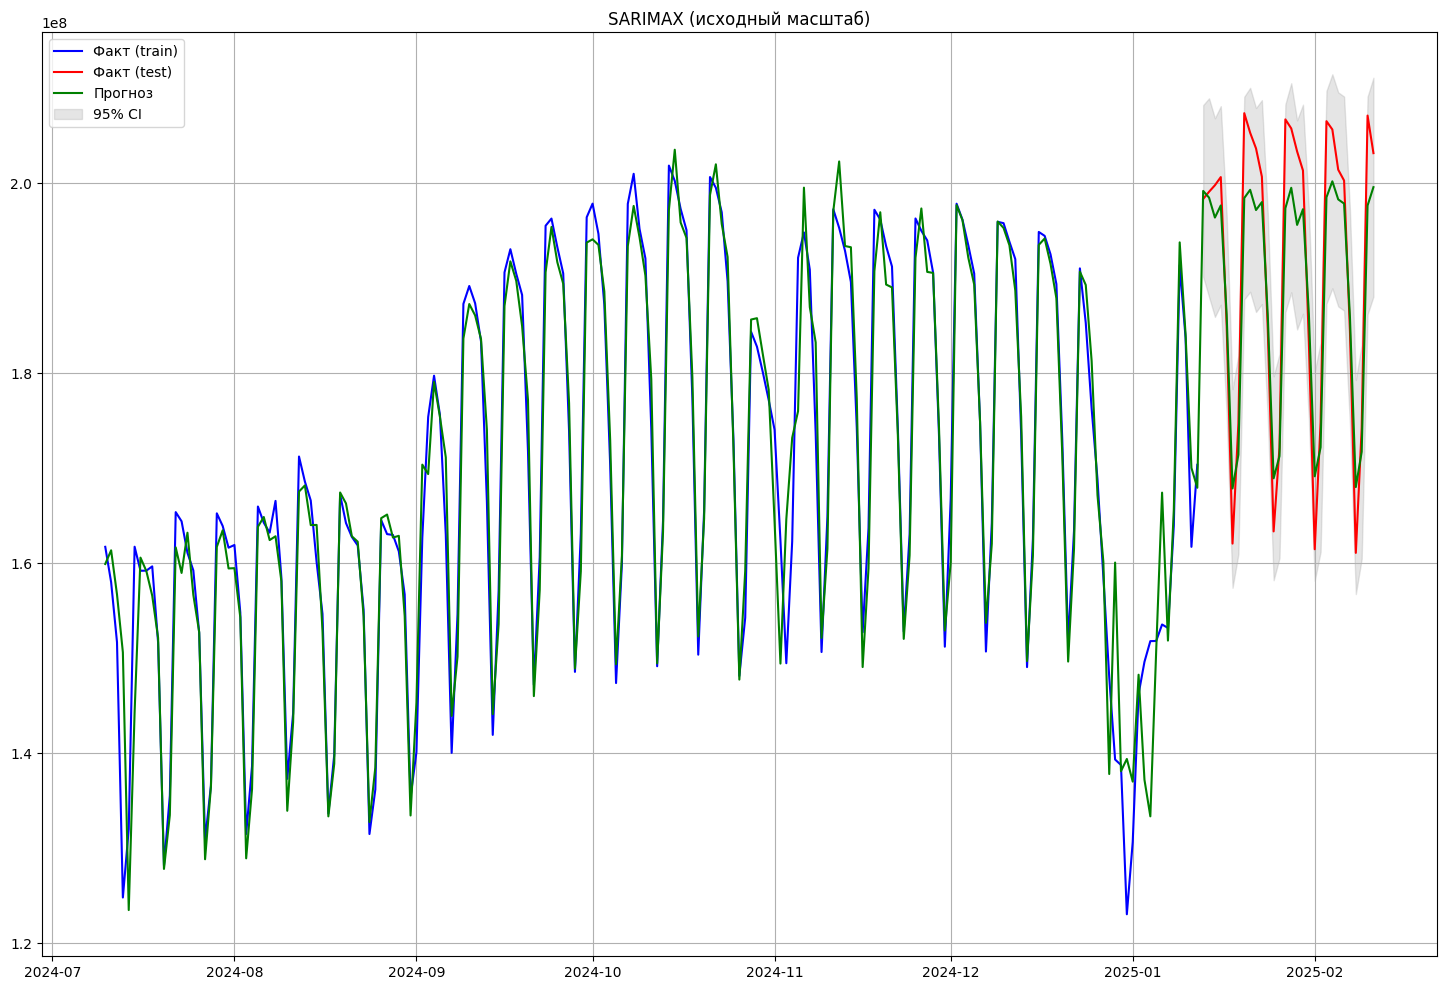

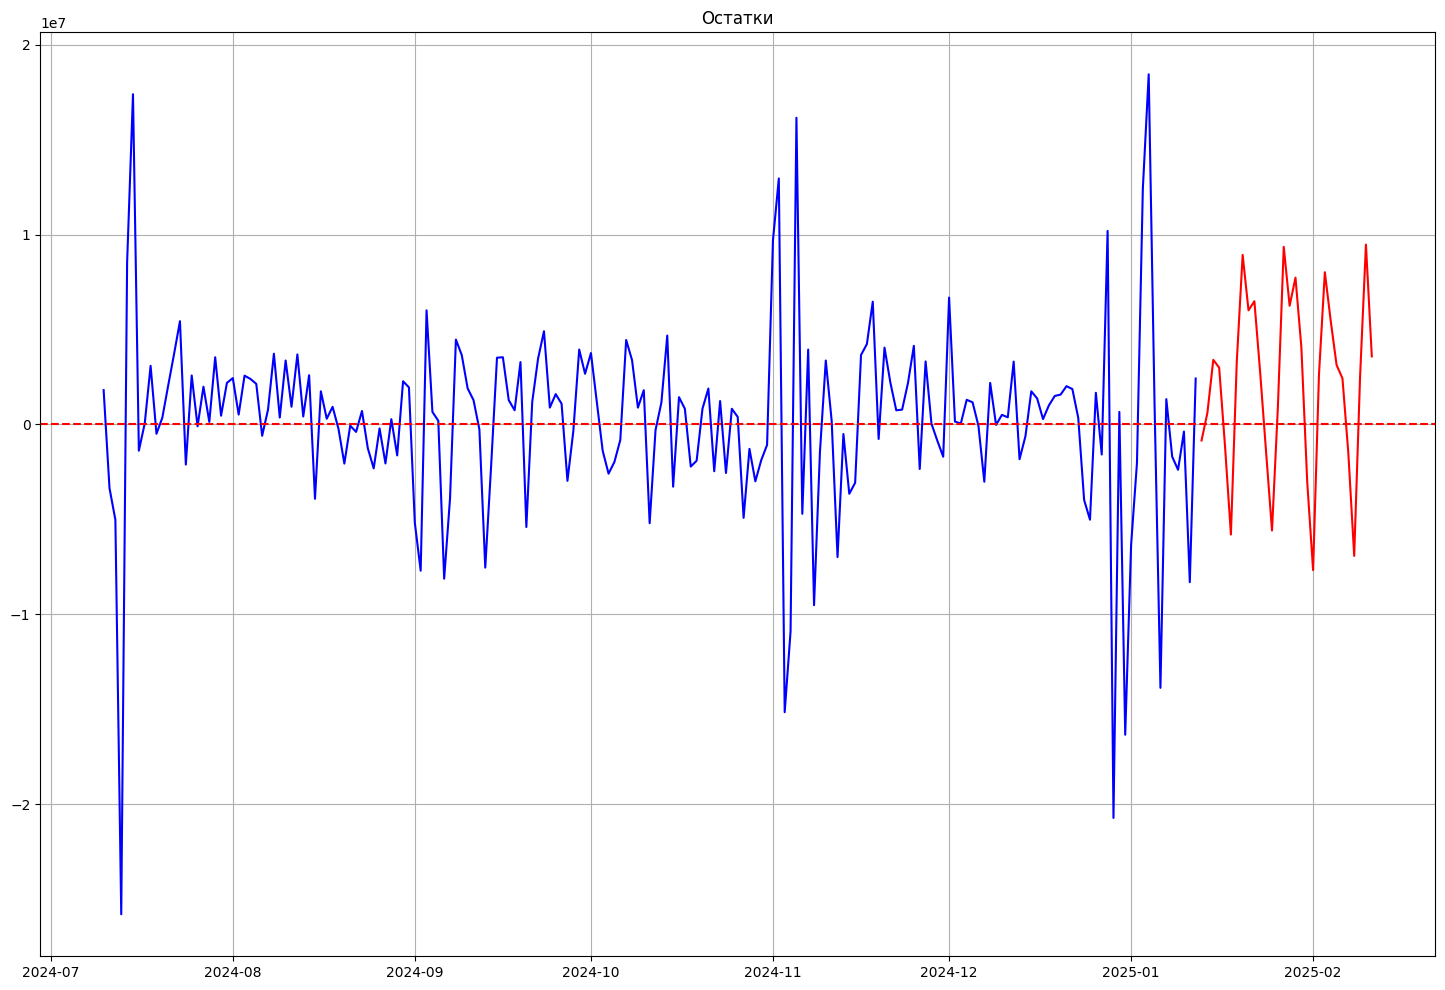


=== ADF-тест (Остатки весь ряд) ===
p-value: 0.0009
ADF-статистика = -4.111729163008042
критические значения = '1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647
✓ Ряд стационарен (отвергаем H0)

=== ADF-тест (Остатки тест) ===
p-value: 0.0844
ADF-статистика = -2.643348837096445
критические значения = '1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307
⚠ Ряд нестационарен! (не отвергаем H0)

=== ADF-тест (Остатки трейн) ===
p-value: 0.0000
ADF-статистика = -10.118210167559052
критические значения = '1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586
✓ Ряд стационарен (отвергаем H0)
TtestResult(statistic=1.3500457718583805, pvalue=0.17841428975187293, df=216)

=== t-тест среднего (Остатки весь ряд) ===
p-value: 0.1784
t-статистика: 1.3500457718583805
Критические значения: 1%: 2.5987816682038685, 5%: 1.9710074720029067, 10%: 1.651938651366145
✓ Смещение не обнаружено
TtestResult(statistic=2.503639612725

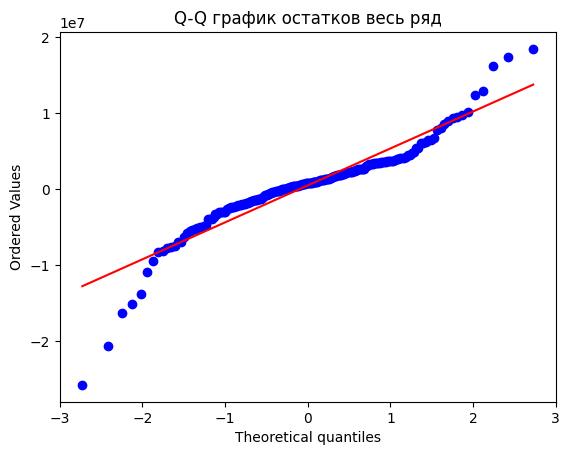

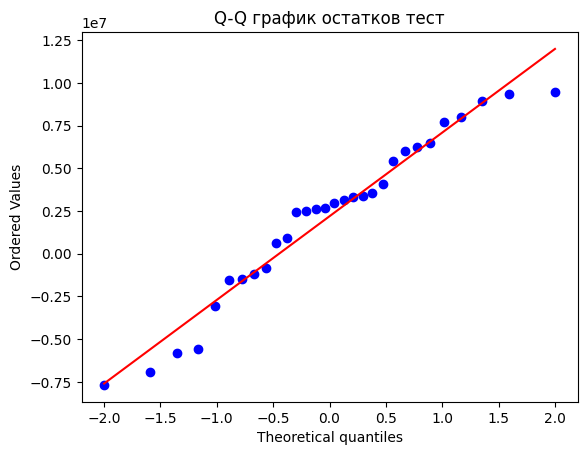

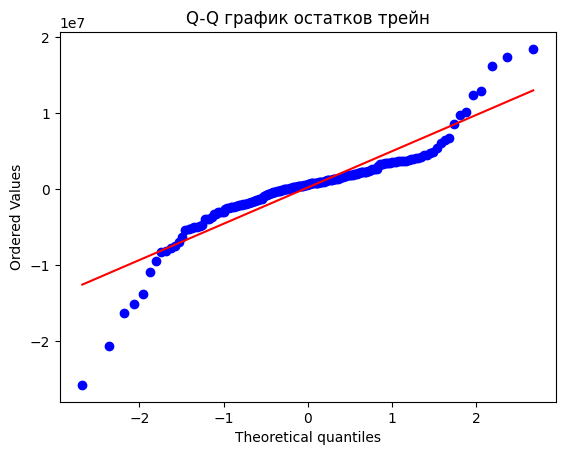

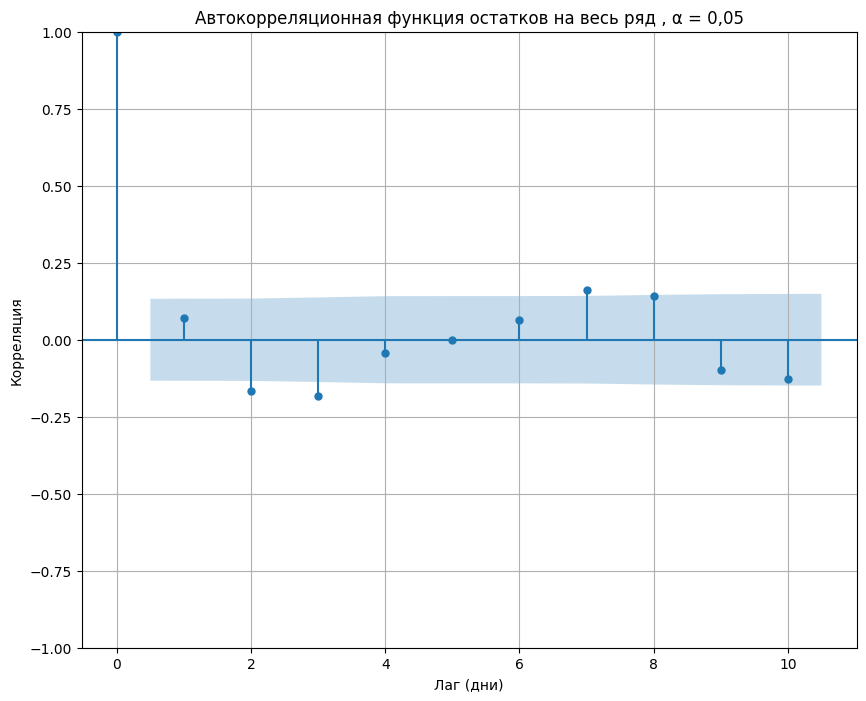

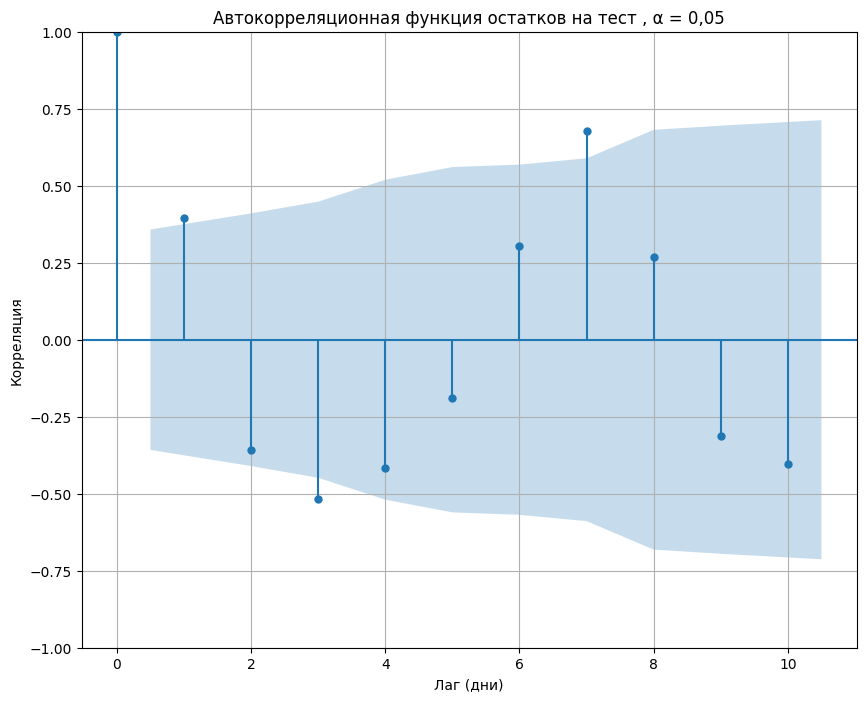

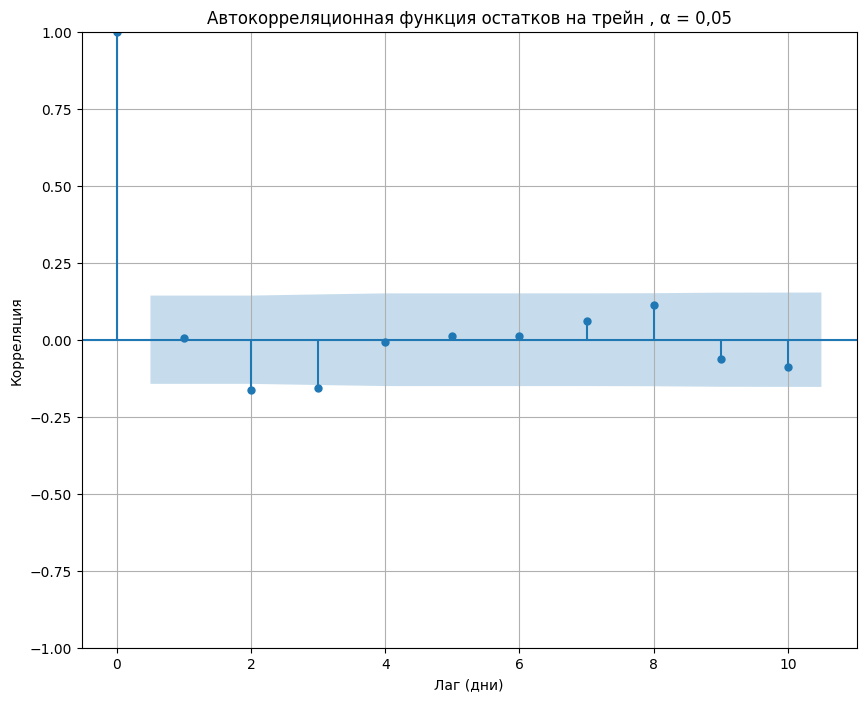

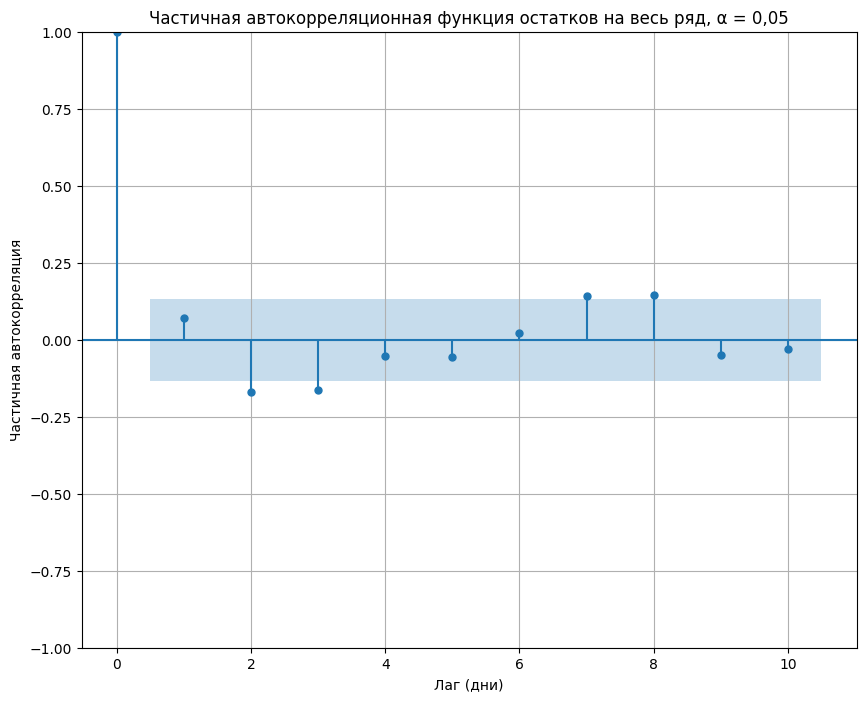

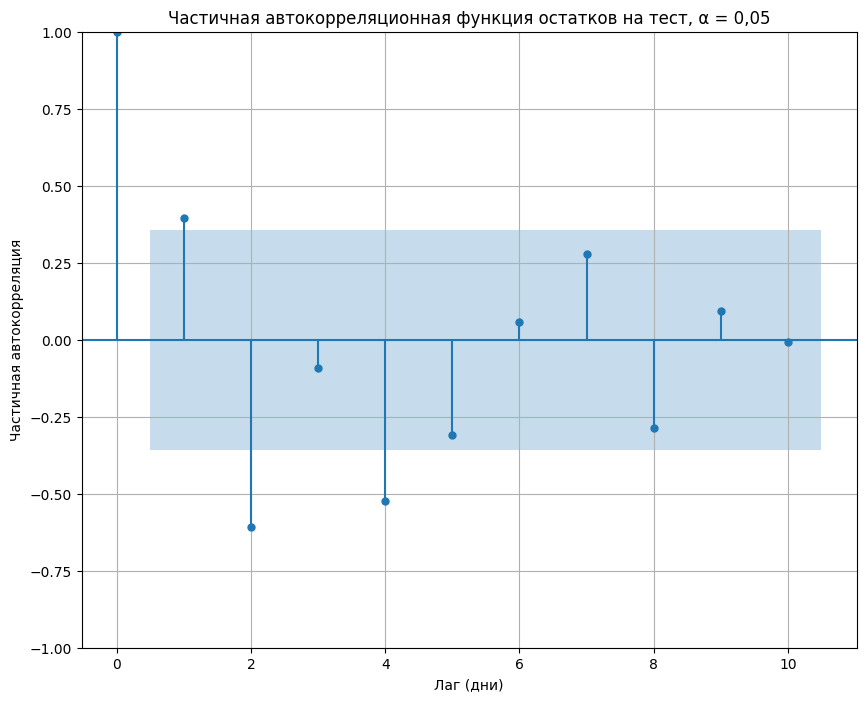

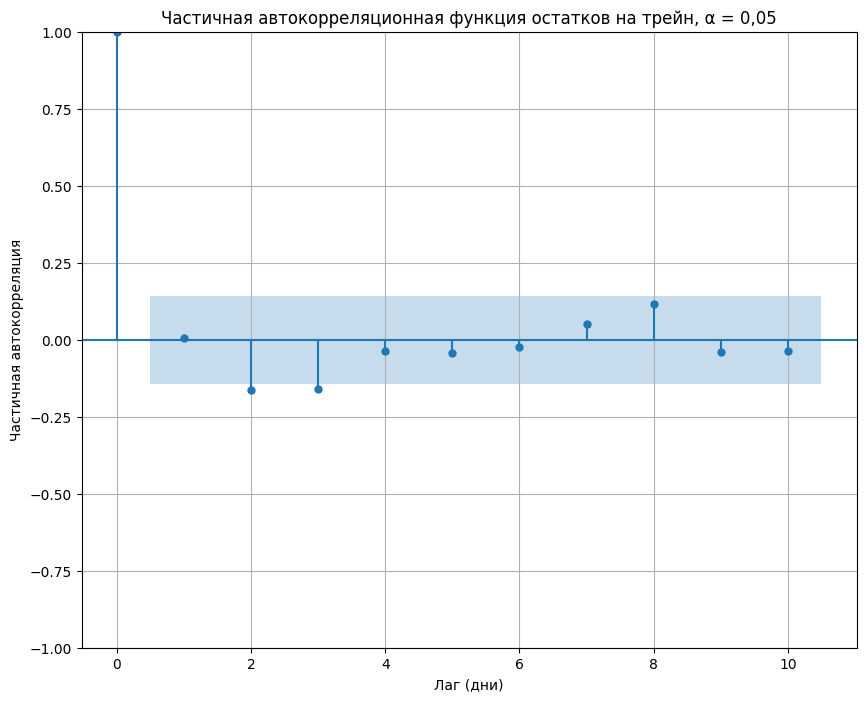

[['ADF_test', True], ['ADF_test', False], ['ADF_test', True], ['t_mean_test', True], ['t_mean_test', False], ['t_mean_test', True], ['autocorrelation_test', False], ['autocorrelation_test', False], ['autocorrelation_test', True], ['normality_test', False], ['normality_test', True], ['normality_test', False]]

--- Метрики для модели: SARIMAX ---
Данные для Train: 187 точек. Данные для Test: 30 точек.
MAE   Train: 3226406.9996
MAE   Test: 4464520.8119
MSE   Train: 26277731659224.7383
MSE   Test: 27108847396543.7656
RMSE  Train: 5126181.0014
RMSE  Test: 5206615.7335
MAPE  Train: 2.01%     
MAPE  Test: 2.33%     
R2    Train: 0.9348    
R2    Test: 0.8916    
---------------------------------------------


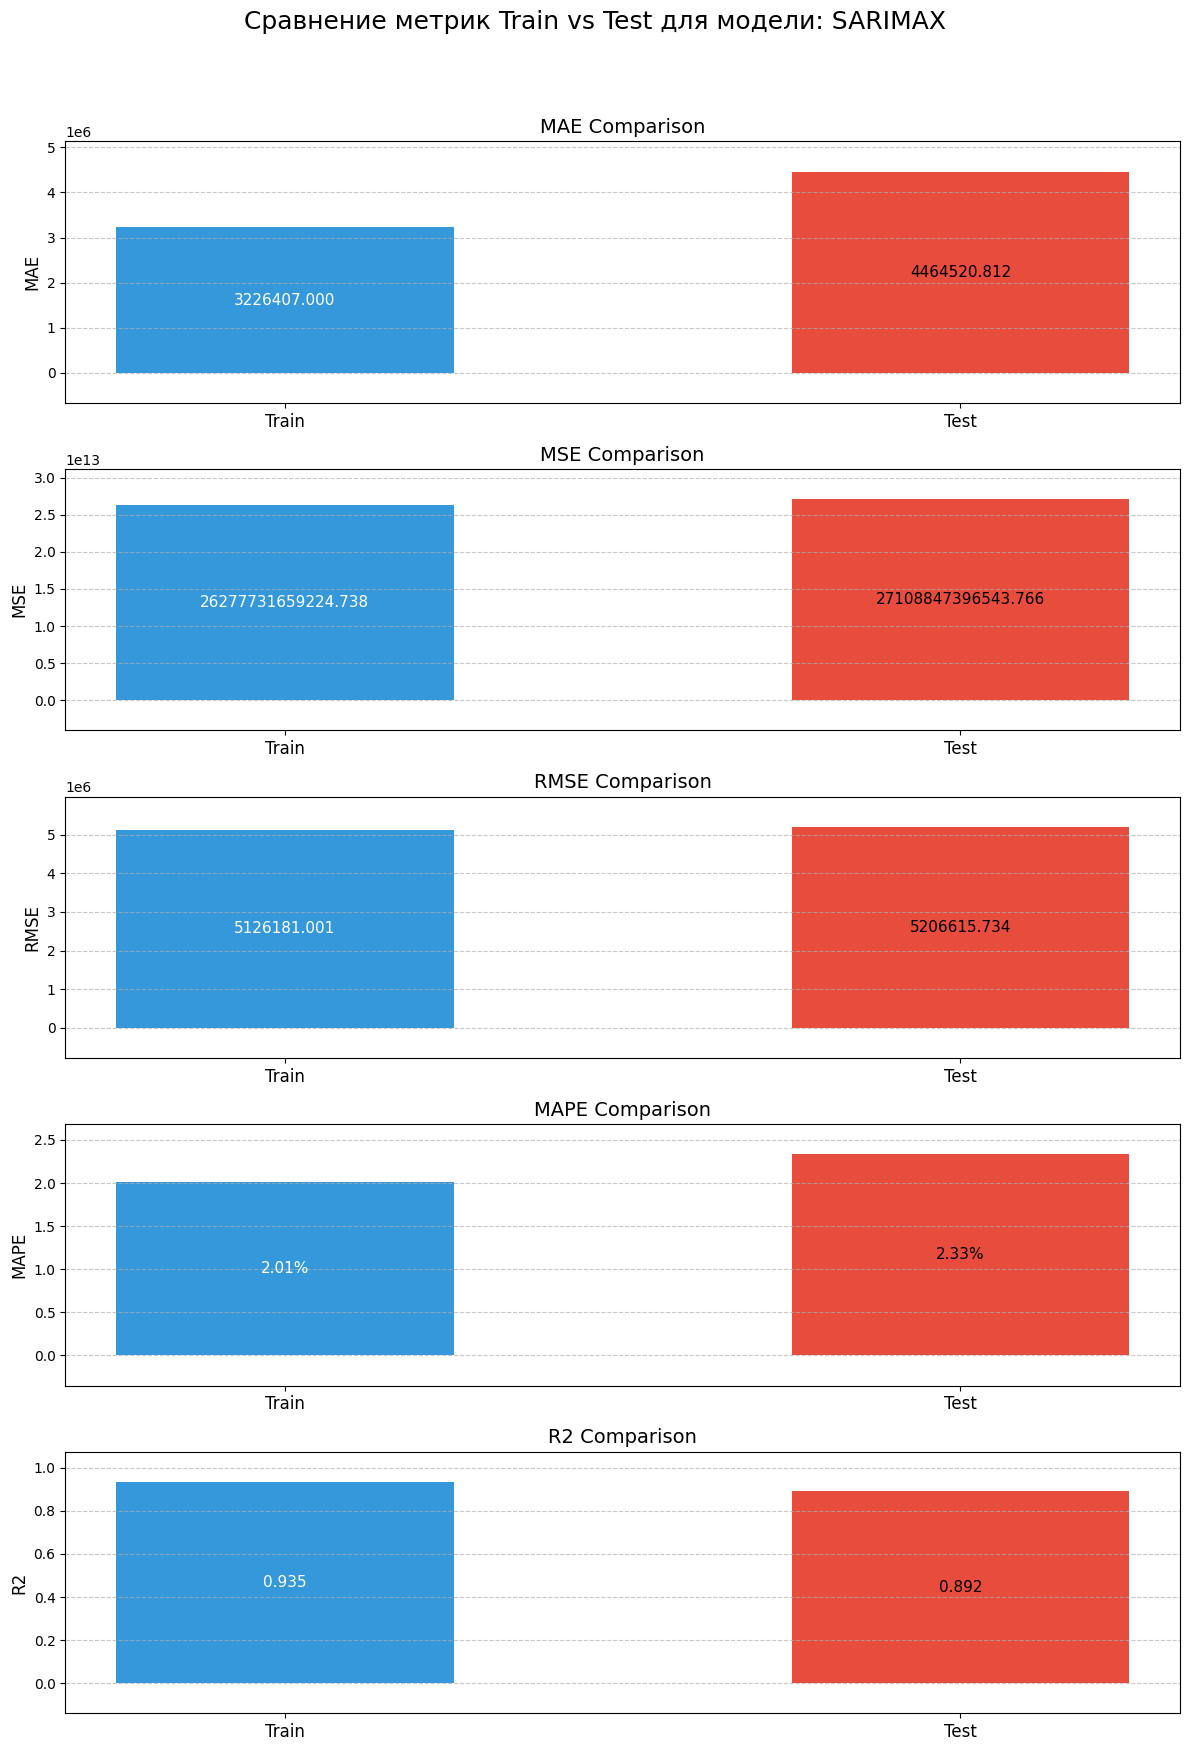

In [82]:
sarima_pred = SARIMAX(y_train, y_test, X_train, X_test, ['SARIMAX'],scaler = scaler) #'AR','MA','ARMA','ARIMA','SARIMA','SARIMAX'

In [83]:
print(len(X_train) )
len(X_test)

188


30

In [84]:
print(X_train)

            Year     trend  holiday_weight  Views_lag_365
Время                                                    
2024-07-09     1 -1.126843             0.0      -0.326188
2024-07-10     1 -1.149376             0.0      -0.348809
2024-07-11     1 -1.149183             0.0      -0.366772
2024-07-12     1 -1.144822             0.0      -0.499370
2024-07-13     1 -1.156951             0.0      -0.883375
...          ...       ...             ...            ...
2025-01-08     2  0.580972             0.9       0.924660
2025-01-09     2  0.582902             0.0       0.933503
2025-01-10     2  0.584832             0.0       1.089513
2025-01-11     2  0.586762             0.0       0.330039
2025-01-12     2  0.588692             0.0      -0.672956

[188 rows x 4 columns]


In [85]:
columns = [
    # ===== 1. БАЗОВЫЕ ДАТЫ =====
    'Year', 
        'Month',
       'Day',

      'trend',

    
    # # ===== 2. ПРОИЗВОДНЫЕ ДАТЫ =====
    # 'DayOfYear',     # День года (1-366)
    # 'WeekOfYear',    # Неделя года (1-52)
      # 'DayOfWeek',     # День недели (0-6)
    
    # # ===== 3. ТРИГОНОМЕТРИЧЕСКИЕ ПРЕОБРАЗОВАНИЯ =====
    # # Месячные циклы
    #   'Month_sin',
    #  'Month_cos',
    
    # # # Дневные циклы
    #   'Day_sin',
    #   'Day_cos',
    
    # # Годовые циклы
    # 'DayOfYear_sin',
    # 'DayOfYear_cos',
    
    # # Недельные циклы
    # 'WeekOfYear_sin',
    # 'WeekOfYear_cos',
    
    # ===== 4. ДНИ НЕДЕЛИ =====
    # One-hot кодировка
     # 'weekday_weight',
    
    'Day_Monday',
    'Day_Tuesday',
    'Day_Wednesday',
    'Day_Thursday',
     # 'Day_Friday',
    'Day_Saturday',
    'Day_Sunday',
    
    # ===== 5. ВЫХОДНЫЕ И ПРАЗДНИКИ =====
    # 'IsWeekend',      # Флаг выходного дня
    
    # # Общие праздничные признаки
     # 'is_holiday',     # Флаг праздника (0/1)
    'holiday_weight', # Вес праздника (0.0-1.0)
    
    # One-hot кодировка праздников
    # 'Новогодние каникулы',
    # 'Рождество Христово',
    # 'День защитника Отечества',
    # 'Международный женский день',
    # 'Праздник Весны и Труда',
    # 'День Победы',
    # 'День России',
    # 'День народного единства',
    
    # # ===== 6. ЛАГИ (ИСТОРИЧЕСКИЕ ДАННЫЕ) =====
    # 'Views_lag_35',  # Данные 35 дней назад
    # 'Views_lag_42',  # Данные 6 недель назад
    # 'Views_lag_49'   # Данные 7 недель назад
     'Views_lag_365'   # Данные 7 недель назад


]

X_train = data.iloc[max_lag:int_train_test][columns]
X_test = data.iloc[int_train_test::][columns]
print(X_train.columns)
print(len(X_train))
for i in columns:
    print(i)
print(*columns)

Index(['Year', 'Month', 'Day', 'trend', 'Day_Monday', 'Day_Tuesday',
       'Day_Wednesday', 'Day_Thursday', 'Day_Saturday', 'Day_Sunday',
       'holiday_weight', 'Views_lag_365'],
      dtype='object')
188
Year
Month
Day
trend
Day_Monday
Day_Tuesday
Day_Wednesday
Day_Thursday
Day_Saturday
Day_Sunday
holiday_weight
Views_lag_365
Year Month Day trend Day_Monday Day_Tuesday Day_Wednesday Day_Thursday Day_Saturday Day_Sunday holiday_weight Views_lag_365


Удаляем регрессор: Day с p-value 0.38087415106589173

Отобранные признаки: ['Year', 'Month', 'trend', 'Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Saturday', 'Day_Sunday', 'holiday_weight', 'Views_lag_365']

--- Сводка модели OLS (Statsmodels) на всём ряде ---
                                 OLS Regression Results                                
Dep. Variable:       Views_normalized   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              385.0
Date:                Fri, 06 Jun 2025   Prob (F-statistic):                   3.07e-131
Time:                        23:05:06   Log-Likelihood:                          2.2376
No. Observations:                 218   AIC:                                      17.52
Df Residuals:                     207   BIC:                                      54.75
Df Model:    

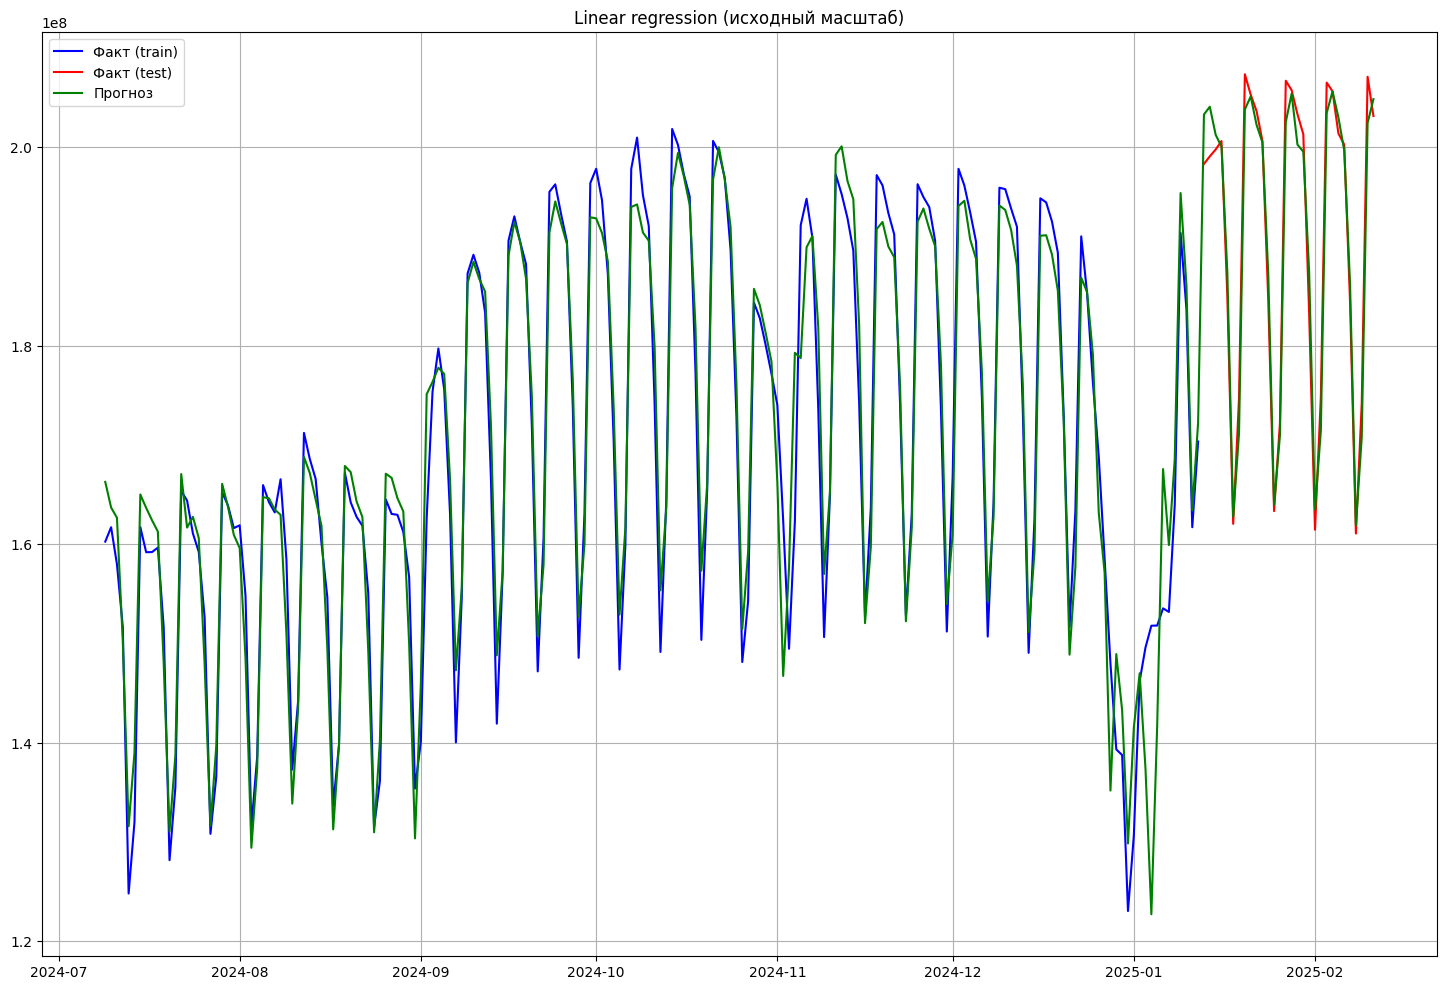

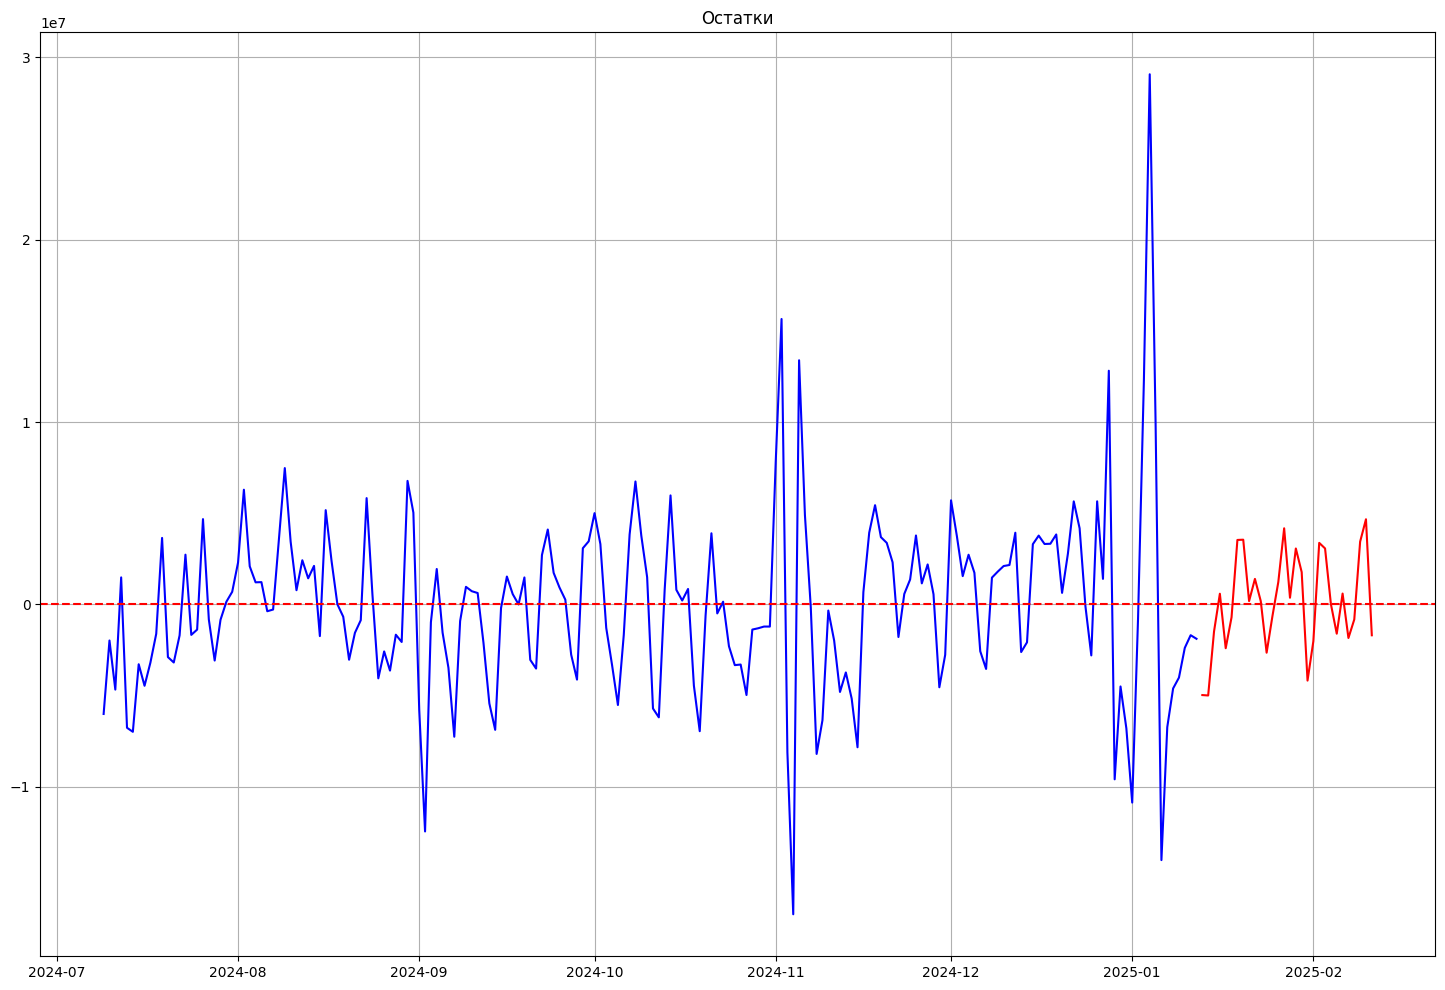


=== ADF-тест (Остатки весь ряд) ===
p-value: 0.0001
ADF-статистика = -4.691698780260663
критические значения = '1%': -3.46172743446274, '5%': -2.8753374677799957, '10%': -2.574124089081557
✓ Ряд стационарен (отвергаем H0)

=== ADF-тест (Остатки тест) ===
p-value: 0.0014
ADF-статистика = -4.001054782350476
критические значения = '1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307
✓ Ряд стационарен (отвергаем H0)

=== ADF-тест (Остатки трейн) ===
p-value: 0.0006
ADF-статистика = -4.2076276827429355
критические значения = '1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274
✓ Ряд стационарен (отвергаем H0)
TtestResult(statistic=-0.13055003789432765, pvalue=0.8962522114712067, df=217)

=== t-тест среднего (Остатки весь ряд) ===
p-value: 0.8963
t-статистика: -0.13055003789432765
Критические значения: 1%: 2.598675017228742, 5%: 1.9709563005258595, 10%: 1.6519058609590112
✓ Смещение не обнаружено
TtestResult(statistic=0.3387983274737438, 

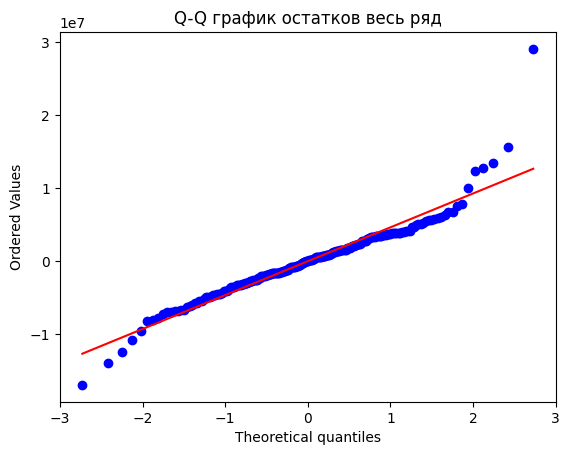

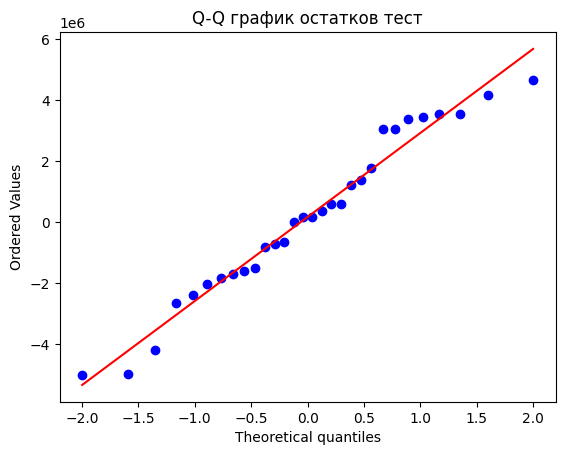

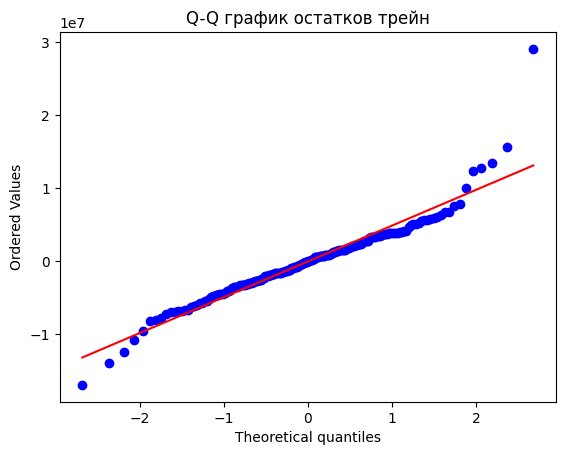

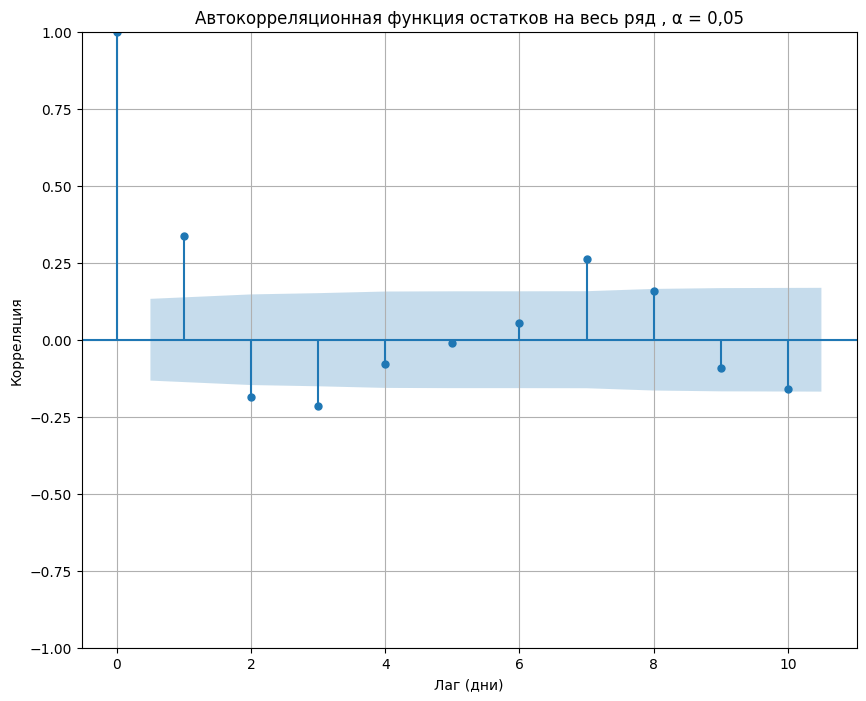

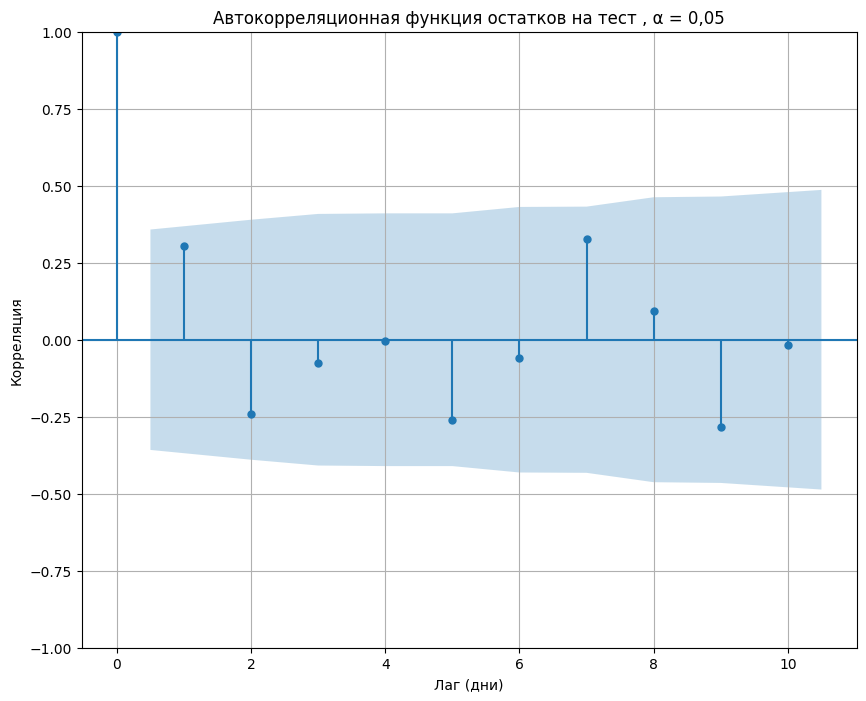

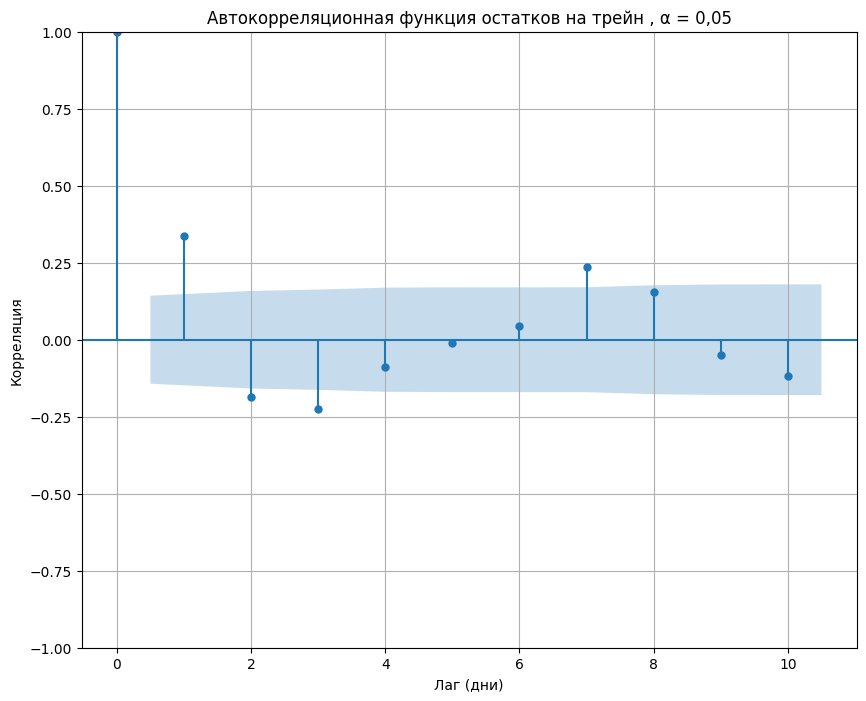

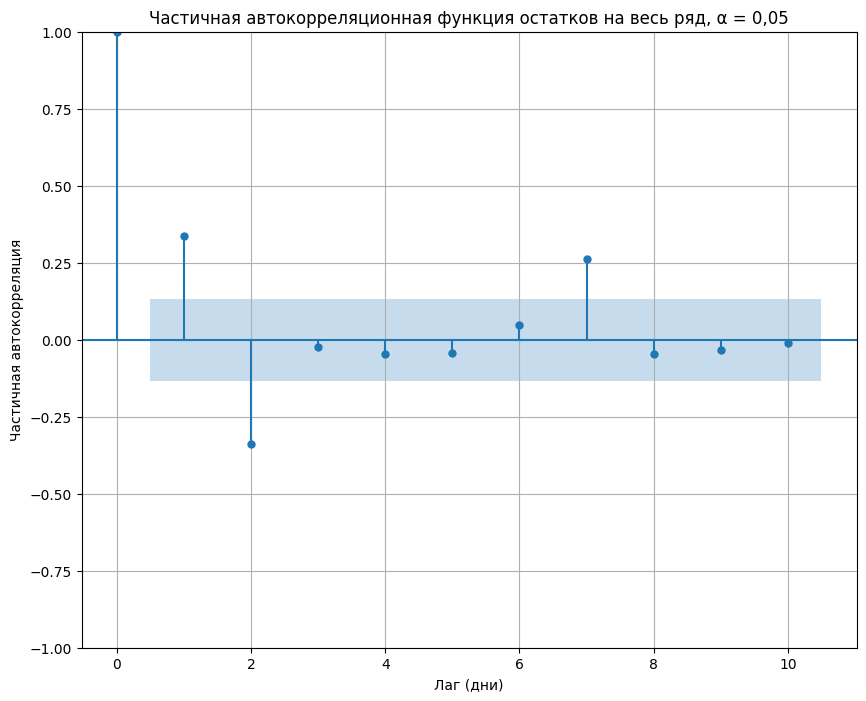

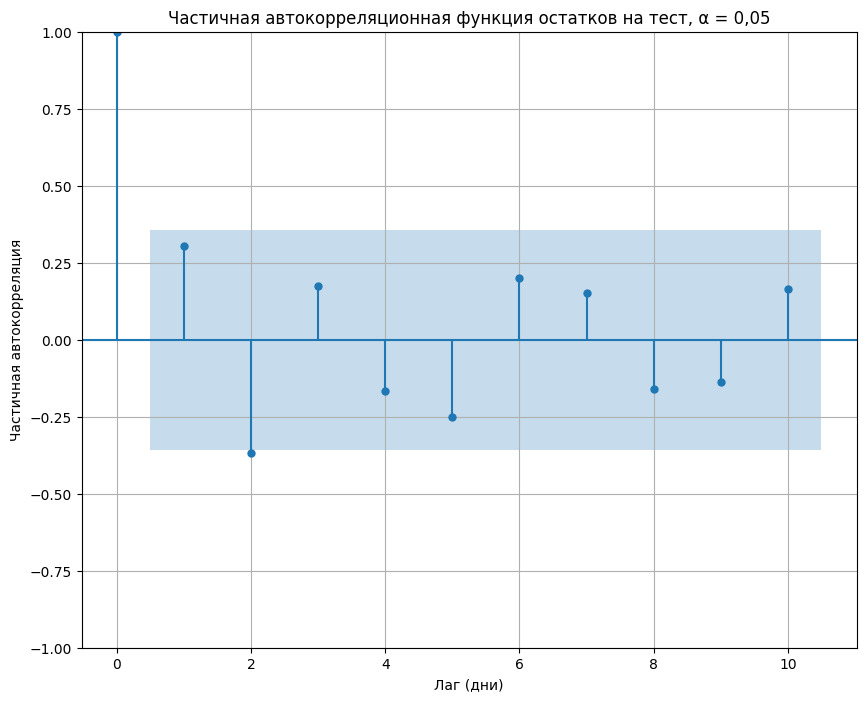

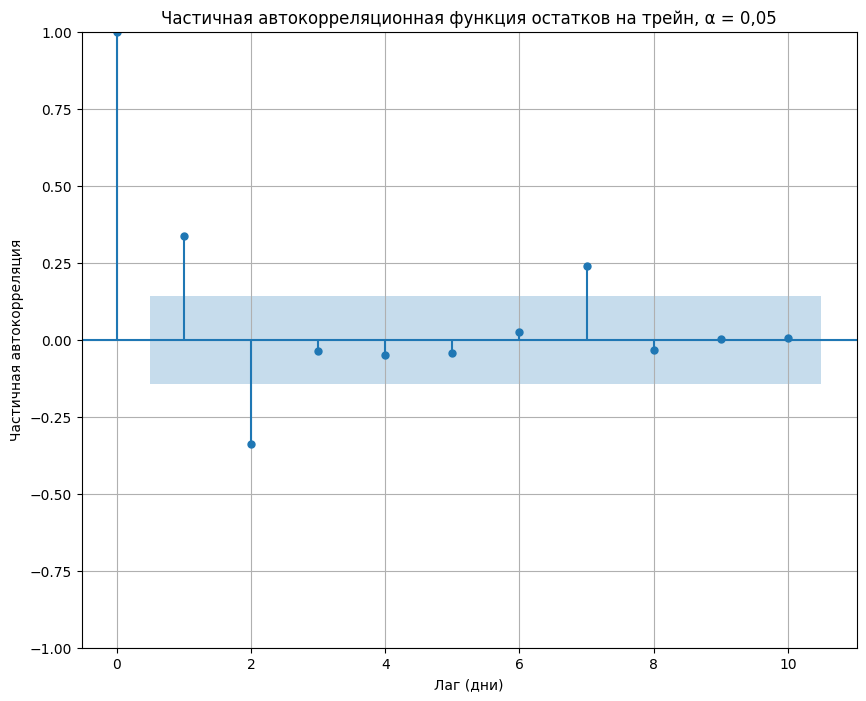


--- Метрики для модели: Linear regression ---
Данные для Train: 188 точек. Данные для Test: 30 точек.
MAE   Train: 3624225.5003
MAE   Test: 2173077.6186
MSE   Train: 25652233495833.6914
MSE   Test: 7016308102242.2998
RMSE  Train: 5064803.4015
RMSE  Test: 2648831.4598
MAPE  Train: 2.24%     
MAPE  Test: 1.14%     
R2    Train: 0.9361    
R2    Test: 0.9720    
---------------------------------------------


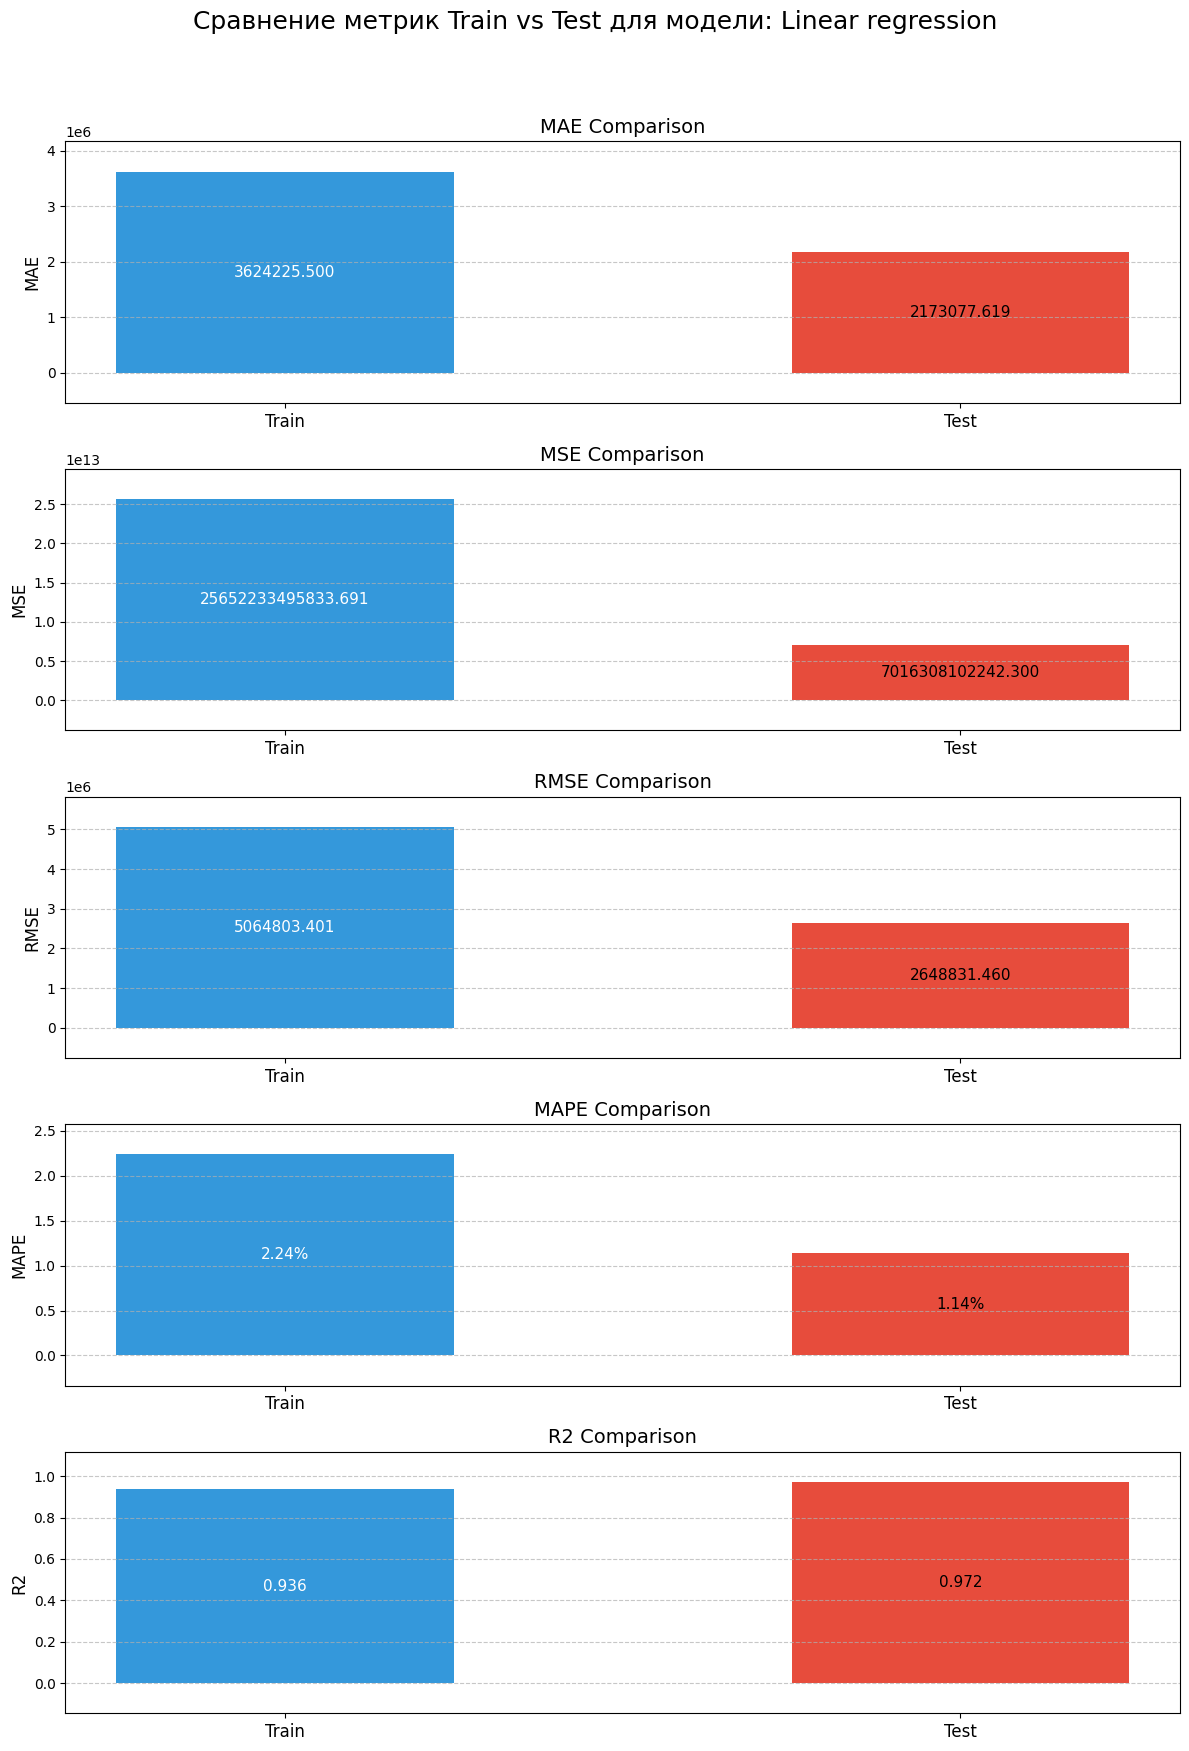

ADF_test True
ADF_test True
ADF_test True
t_mean_test True
t_mean_test True
t_mean_test True
autocorrelation_test False
autocorrelation_test True
autocorrelation_test False
normality_test False
normality_test True
normality_test False


In [86]:
import pandas as pd
import statsmodels.api as sm
# Обучение модели с пошаговым исключением незначимых регрессоров
X_train_selected = X_train.copy()
model_sm = sm.OLS(y_train, X_train_selected)
results_sm = model_sm.fit()

regressor_p = results_sm.pvalues

while (regressor_p > 0.05).any():  # Цикл продолжается, пока хотя бы один p-value > 0.05
    regressor_drop = regressor_p.idxmax()  # Находим регрессор с максимальным p-value
    print(f"Удаляем регрессор: {regressor_drop} с p-value {regressor_p[regressor_drop]}")
    
    # Удаляем соответствующую переменную из набора признаков
    X_train_selected = X_train_selected.drop(columns=[regressor_drop])
    
    # Перестроение модели с новым набором признаков
    model_sm = sm.OLS(y_train, X_train_selected)
    results_sm = model_sm.fit()
    
    # Обновляем p-values
    regressor_p = results_sm.pvalues

# Финальный набор признаков
selected_features = X_train_selected.columns
print(f"\nОтобранные признаки: {list(selected_features)}")

# Приведение X_test к тем же признакам
X_test_selected = X_test[selected_features]

# Объединение X_train и X_test по выбранным признакам
X_full = pd.concat([X_train_selected, X_test_selected])
y_full = pd.concat([y_train, y_test])  # если есть y_test, иначе используйте только y_train

# Обучение модели на всём временном ряде с отобранными признаками
model_full = sm.OLS(y_full, X_full)
results_full = model_full.fit()

# Прогноз по всему временному ряду
y_pred_full = results_full.predict(X_full)

# Вывод сводки модели
print("\n--- Сводка модели OLS (Statsmodels) на всём ряде ---")
print(results_full.summary())
print("--------------------------------------\n")

# Пример сохранения прогноза в DataFrame
forecast_df = pd.DataFrame({
    'Actual': y_full,
    'Predicted': y_pred_full
})
# conf_int = test_forecast.conf_int()
print(forecast_df.head())

tests = (plot(y_pred_full, y_train, y_test, 'Linear regression',scaler = scaler))
score(y_pred_full, y_train, y_test, scaler, 'Linear regression')
for i in tests:
    print(*i)

linear_pred = y_pred_full

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.concat((X_train,y_train),axis = 1).corr(), 
            annot=True,  # Добавить значения в ячейки
            fmt=".2f",   # Формат чисел (2 знака после запятой)
            cmap="coolwarm",  # Цветовая схема
            center=0,     # Центр шкалы (0 для корреляции)
            linewidths=0.5)

# Заголовок
plt.title("Матрица корреляции", pad=20)
plt.show()

In [ ]:
plt.figure(figsize=(24, 18))
sns.heatmap(data[['Views', 'Year', 'Month', 'Day', 'DayOfYear', 'WeekOfYear', 'DayOfWeek',
       'IsWeekend', 'is_holiday', 'holiday_weight',
       'weekday_weight', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday','Month_sin', 'Month_cos', 'days_in_month', 'Day_sin',
       'Day_cos', 'DayOfYear_sin', 'DayOfYear_cos', 'WeekOfYear_sin',
       'WeekOfYear_cos', 'Views_lag_365']].corr(), 
            annot=True,  # Добавить значения в ячейки
            fmt=".2f",   # Формат чисел (2 знака после запятой)
            cmap="coolwarm",  # Цветовая схема
            center=0,     # Центр шкалы (0 для корреляции)
            linewidths=0.5)

# Заголовок
plt.title("Матрица корреляции", pad=20)
plt.show()

In [ ]:
X_train = pd.concat([
    X_train,linear_pred.iloc[0:len(X_train)].rename("linear_pred")
], axis=1)
X_test = pd.concat([
    X_test, linear_pred.iloc[len(X_train):].rename("linear_pred")
], axis=1)

In [ ]:
X_train = pd.concat([
    X_train, 
    sarima_pred.iloc[0:len(X_train)].rename("sarima_pred"),
], axis=1)

X_test = pd.concat([
    X_test,
    sarima_pred.iloc[len(X_train):].rename("sarima_pred"),
], axis=1)

In [ ]:
print(X_train)

In [ ]:
X_train = X_train.drop(['sarima_pred'], axis=1)
X_test = X_test.drop(['sarima_pred'], axis=1)

In [ ]:
X_train = X_train.drop(['linear_pred'], axis=1)
X_test = X_test.drop(['linear_pred'], axis=1)

In [ ]:
holiday_weights = {
    'Новый год': 10,
    'Новогодние каникулы': 9,
    'Рождество Христово': 8,
    'День защитника Отечества': 7,
    'Международный женский день': 6,
    'Праздник Весны и Труда': 5,
    'День Победы': 4,
    'День России': 3,
    'День народного единства': 2
}

def get_holiday_weight(date, holiday_name):
    # Проверяем 30 и 31 декабря
    if (date.month == 12) and (date.day == 30):
        return 8
    if (date.month == 12) and (date.day == 31):
        return 8
    if (date.month == 1) and (date.day == 1):
        return 10
    
    # Проверяем обычные праздники
    if holiday_name is None:
        return 0
    for holiday, weight in holiday_weights.items():
        if holiday in str(holiday_name):
            return weight
    return 0

# Только так (не добавлять второй раз через apply!)
data['holiday_weight'] = [get_holiday_weight(date, name) for date, name in zip(data.index, data['holiday_name'])]

In [ ]:
columns = [
    # ===== 1. БАЗОВЫЕ ДАТЫ =====
     'Year', 
    'Month',
    'Day',
     'trend',

    
    # ===== 2. ПРОИЗВОДНЫЕ ДАТЫ =====
     'DayOfYear',     # День года (1-366)
    # 'WeekOfYear',    # Неделя года (1-52)
       'DayOfWeek',     # День недели (0-6)
    
    # ===== 3. ТРИГОНОМЕТРИЧЕСКИЕ ПРЕОБРАЗОВАНИЯ =====
    # Месячные циклы
    #  'Month_sin',
    #  'Month_cos',
    
    # # Дневные циклы
    #  'Day_sin',
    #  'Day_cos',
    
    # # Годовые циклы
    # 'DayOfYear_sin',
    # 'DayOfYear_cos',
    
    # Недельные циклы
    # 'WeekOfYear_sin',
    # 'WeekOfYear_cos',
    
    # ===== 4. ДНИ НЕДЕЛИ =====
     # 'weekday_weight',
    # One-hot кодировка
    # 'Day_Monday',
    # 'Day_Tuesday',
    # 'Day_Wednesday',
    # 'Day_Thursday',
    #  'Day_Friday',
    # 'Day_Saturday',
    # 'Day_Sunday',
    
    # ===== 5. ВЫХОДНЫЕ И ПРАЗДНИКИ =====
      'IsWeekend',      # Флаг выходного дня
    
    # # Общие праздничные признаки
      'is_holiday',     # Флаг праздника (0/1)
     'holiday_weight', # Вес праздника (0.0-1.0)
    
    # One-hot кодировка праздников
    # 'Новогодние каникулы',
    # 'Рождество Христово',
    # 'День защитника Отечества',
    # 'Международный женский день',
    # 'Праздник Весны и Труда',
    # 'День Победы',
    # 'День России',
    # 'День народного единства',
    
    # ===== 6. ЛАГИ (ИСТОРИЧЕСКИЕ ДАННЫЕ) =====
    # 'Views_lag_35',  # Данные 35 дней назад
    # 'Views_lag_42',  # Данные 6 недель назад
    # 'Views_lag_49',   # Данные 7 недель назад
    # 'Views_lag_365'   # Данные 7 недель назад
]


X_train = data.iloc[max_lag:int_train_test][columns]
X_test = data.iloc[int_train_test::][columns]
print(X_train.columns)
for i in columns:
    print(i)
print(columns)

In [ ]:
from catboost import CatBoostRegressor
# Определяем категориальные признаки (укажите нужные)
cat_features_actual = [
      'DayOfWeek',
       'holiday_weight',
      'Year', 
    'Month',
     'Day',

    
    # ===== 2. ПРОИЗВОДНЫЕ ДАТЫ =====
      'DayOfYear',
    'IsWeekend',
     'is_holiday',
    



]


# ----- БАЗОВАЯ МОДЕЛЬ CATBOOST -----
model_base = CatBoostRegressor(
    iterations=150, 
    learning_rate=0.05,
    depth=3,  
    l2_leaf_reg=3,
    # early_stopping_rounds=50,
    random_seed=42,
    verbose=50,
    cat_features=cat_features_actual
)

# Обучение модели
model_base.fit(
    X_train, 
    y_train,
    eval_set=(X_test, y_test),
    plot=True
)

# Прогнозирование и создание DataFrame
train_pred = model_base.predict(X_train)
test_pred = model_base.predict(X_test)


train_pred = pd.Series(
    model_base.predict(X_train),
    index=X_train.index,
    name='Predicted'
)
test_pred = pd.Series(
    model_base.predict(X_test),
    index=X_test.index,
    name='Predicted'
)
# Объединенный прогноз в DataFrame
full_forecast = pd.concat([train_pred, test_pred]).to_frame()


# Визуализация и оценка
plot(full_forecast, y_train, y_test, 'CatBoost L',scaler = scaler)
score(full_forecast, y_train, y_test, scaler = scaler,model_name = 'CatBoost')

In [ ]:
from catboost import Pool

feature_names = list(X_train.columns)

train_pool_for_plot = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features_actual, # те же категориальные признаки, что и при обучении
    feature_names=feature_names
)

# Визуализация первого дерева (индекс 0)
# Вы можете выбрать любой другой индекс дерева, если iterations > 1
tree_index_to_plot = 140
print(f"\nПостроение дерева с индексом: {tree_index_to_plot}")
tree_graph = model_base.plot_tree(
    tree_idx=tree_index_to_plot,
    pool=train_pool_for_plot # Передача pool помогает с именами признаков
)
tree_graph.render(f'catboost_tree_{tree_index_to_plot}', format='png', view=True)
print(f"Дерево сохранено как 'catboost_tree_{tree_index_to_plot}.png' и должно было открыться для просмотра.")
